In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
import MDAnalysis as mda
from MDAnalysis.analysis.rms import rmsd

In [100]:
traj_path_list_1 = []
traj_dir_1 = '/media/zychen/盛夏光年/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G1-no-water/natcomm2023-short-imatinib-G1-no-water'
template_path_1 = '/media/zychen/盛夏光年/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G1-no-water/template.pdb'
for file in os.listdir(traj_dir_1):
    if file.endswith('.dcd'):
        traj_path_list_1.append(os.path.join(traj_dir_1, file))
print('\n'.join(traj_path_list_1))

traj_path_list_2 = []
traj_dir_2 = '/media/zychen/盛夏光年/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G2-no-water/natcomm2023-short-imatinib-G2-no-water'
template_path_2 = '/media/zychen/盛夏光年/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G2-no-water/template.pdb'
for file in os.listdir(traj_dir_2):
    if file.endswith('.dcd'):
        traj_path_list_2.append(os.path.join(traj_dir_2, file))
print('\n'.join(traj_path_list_2))

traj_path_list_3 = []
traj_dir_3 = '/media/zychen/盛夏光年/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G3-no-water/natcomm2023-short-imatinib-G3-no-water'
template_path_3 = '/media/zychen/盛夏光年/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G3-no-water/template.pdb'
for file in os.listdir(traj_dir_3):
    if file.endswith('.dcd'):
        traj_path_list_3.append(os.path.join(traj_dir_3, file))
print('\n'.join(traj_path_list_3))

traj_path_list_4 = []
traj_dir_4 = '/media/zychen/盛夏光年/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G4-no-water/natcomm2023-short-imatinib-G4-no-water'
template_path_4 = '/media/zychen/盛夏光年/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G4-no-water/template.pdb'
for file in os.listdir(traj_dir_4):
    if file.endswith('.dcd'):
        traj_path_list_4.append(os.path.join(traj_dir_4, file))
print('\n'.join(traj_path_list_4))


rmsd_list = {}
for k_ in tqdm(range(128)):
    if not k_ in rmsd_list:
        rmsd_list[k_] = []

    query_pdb_path = '/home/zychen/Desktop/deshaw_traj_1704_pdbs_clean_interpolation_pdb/aux_{}.pdb'.format(k_)
    rmsd_tmp_list = []
    # for template_path_, traj_path_list_ in zip([template_path_1, template_path_2, template_path_3, template_path_4], 
    #                                            [traj_path_list_1, traj_path_list_2, traj_path_list_3, traj_path_list_4]):
    for template_path_, traj_path_list_ in zip([template_path_4],
                                                  [traj_path_list_4]):
        for i_traj, tmp_traj_path in enumerate(traj_path_list_):
                
                u = mda.Universe(template_path_, tmp_traj_path)
                u_query = mda.Universe(query_pdb_path)
    
                prot_traj = u.select_atoms('protein and backbone and resid 236-499')
                prot_comp = u_query.select_atoms('protein and backbone and resid 1-264')
                coords_comp = prot_comp.positions
    
                for ts in u.trajectory:
                    coords = prot_traj.positions
                    atoms = prot_traj.atoms
                    assert np.sum([i != j for i, j in zip(atoms.names, prot_comp.atoms.names)]) == 0
                    rmsd_ = rmsd(coords, coords_comp, superposition=True)
                    rmsd_tmp_list.append(rmsd_)

    rmsd_list[k_].extend(rmsd_tmp_list)

/media/zychen/盛夏光年/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G1-no-water/natcomm2023-short-imatinib-G1-no-water/natcomm2023-short-imatinib-G1-no-water-0000.dcd
/media/zychen/盛夏光年/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G1-no-water/natcomm2023-short-imatinib-G1-no-water/natcomm2023-short-imatinib-G1-no-water-0001.dcd
/media/zychen/盛夏光年/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G1-no-water/natcomm2023-short-imatinib-G1-no-water/natcomm2023-short-imatinib-G1-no-water-0002.dcd
/media/zychen/盛夏光年/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G1-no-water/natcomm2023-short-imatinib-G1-no-water/natcomm2023-short-imatinib-G1-no-water-0003.dcd
/media/zychen/盛夏光年/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G2-n

  0%|          | 0/128 [00:00<?, ?it/s]/home/zychen/anaconda3/envs/protein_utils/lib/python3.13/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
100%|██████████| 128/128 [01:01<00:00,  2.07it/s]


In [102]:
for k_ in rmsd_list:
    rmsd_list[k_] = np.argmin(rmsd_list[k_])

In [103]:
rmsd_list

{0: 79,
 1: 79,
 2: 79,
 3: 79,
 4: 79,
 5: 117,
 6: 117,
 7: 117,
 8: 117,
 9: 117,
 10: 117,
 11: 117,
 12: 117,
 13: 117,
 14: 59,
 15: 117,
 16: 117,
 17: 117,
 18: 145,
 19: 145,
 20: 145,
 21: 145,
 22: 118,
 23: 118,
 24: 118,
 25: 118,
 26: 118,
 27: 118,
 28: 118,
 29: 118,
 30: 118,
 31: 118,
 32: 118,
 33: 118,
 34: 118,
 35: 145,
 36: 118,
 37: 145,
 38: 145,
 39: 145,
 40: 138,
 41: 138,
 42: 138,
 43: 138,
 44: 138,
 45: 138,
 46: 48,
 47: 138,
 48: 118,
 49: 145,
 50: 145,
 51: 145,
 52: 145,
 53: 48,
 54: 621,
 55: 48,
 56: 621,
 57: 621,
 58: 145,
 59: 142,
 60: 1672,
 61: 1672,
 62: 1509,
 63: 1509,
 64: 1509,
 65: 1509,
 66: 1509,
 67: 1509,
 68: 1509,
 69: 1509,
 70: 1509,
 71: 1509,
 72: 1509,
 73: 1509,
 74: 1509,
 75: 1509,
 76: 1509,
 77: 1509,
 78: 1672,
 79: 1672,
 80: 1672,
 81: 1672,
 82: 1672,
 83: 1672,
 84: 1516,
 85: 1509,
 86: 1279,
 87: 1506,
 88: 1506,
 89: 1521,
 90: 1521,
 91: 1126,
 92: 1521,
 93: 1126,
 94: 1126,
 95: 1126,
 96: 1126,
 97: 1118,
 

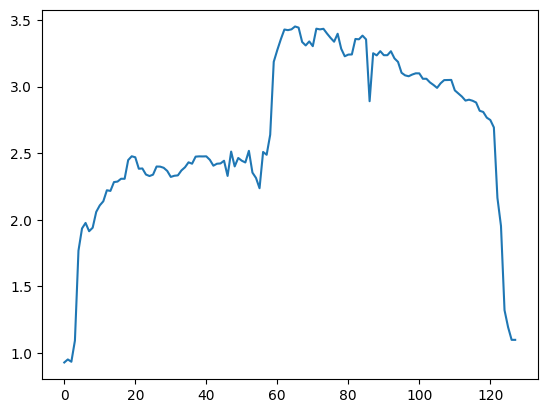

In [96]:
plt.plot([np.min(rmsd_list[k_]) for k_ in rmsd_list])
plt.show()

In [99]:
len(rmsd_list[k_])

9755

In [71]:
traj_path_list = []
traj_dir_1 = '/media/zychen/盛夏光年/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-imatinib-binding-G0-5559010-main1-no-water/natcomm2023-imatinib-binding-G0-5559010-main1-no-water'
traj_dir_2 = '/media/zychen/盛夏光年/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-imatinib-binding-G0-5558993-main2-no-water/natcomm2023-imatinib-binding-G0-5558993-main2-no-water'
# example: 'natcomm2023-imatinib-binding-G0-5558993-main2-no-water-0000.dcd'
for i in range(100):
    traj_path_list.append(os.path.join(traj_dir_1, f'natcomm2023-imatinib-binding-G0-5559010-main1-no-water-{i:04d}.dcd'))
for i in range(100):
    traj_path_list.append(os.path.join(traj_dir_2, f'natcomm2023-imatinib-binding-G0-5558993-main2-no-water-{i:04d}.dcd'))

print(len(traj_path_list), len(os.listdir(traj_dir_1)), len(os.listdir(traj_dir_2)))

200 102 102


In [ ]:
# I want to use mdanalysis to read the trajectory and calculate the RMSD to certain query structure
traj_rmsd_min_list = []
traj_min_id_list = []

overall_rmsd_dict = {}
for k_ in range(128):
    query_pdb_path = '/home/zychen/Desktop/deshaw_traj_1704_pdbs_clean_interpolation_pdb/aux_{}.pdb'.format(k_)
    # query_pdb_path = '/home/zychen/Desktop/deshaw_traj_1704_pdbs_clean_interpolation_pdb/aux_88.pdb'
    template_path = '/media/zychen/盛夏光年/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-imatinib-binding-G0-5559010-main1-no-water/template.pdb'

    if not k_ in overall_rmsd_dict:
        overall_rmsd_dict[k_] = {}

    for i_traj, tmp_traj_path in tqdm(enumerate(traj_path_list)):
        if not i_traj in overall_rmsd_dict[k_]:
            overall_rmsd_dict[k_][i_traj] = []

        u = mda.Universe(template_path, tmp_traj_path)
        u_query = mda.Universe(query_pdb_path)

        prot_traj = u.select_atoms('protein and backbone and resid 236-499')
        prot_comp = u_query.select_atoms('protein and backbone and resid 1-264')
        coords_comp = prot_comp.positions
        # print(len(prot_comp.atoms.residues.resids))
        # print(len(prot_comp.atoms.resnames))
        # print(prot_comp.atoms.names)
        # print(prot_comp.atoms.resnames)

        for ts in u.trajectory:
            coords = prot_traj.positions
            atoms = prot_traj.atoms
            assert np.sum([i != j for i, j in zip(atoms.names, prot_comp.atoms.names)]) == 0
            rmsd_ = rmsd(coords, coords_comp, superposition=True)
            overall_rmsd_dict[k_][i_traj].append(rmsd_)
            # rmsd = align.alignto(prot_traj, prot_comp)
            # print(rmsd)
    
    statistic_rmsd_list = []
    for tmp_i in overall_rmsd_dict[k_]:
        statistic_rmsd_list.extend(overall_rmsd_dict[k_][tmp_i])
    print(np.min(statistic_rmsd_list), np.argmin(statistic_rmsd_list), len(statistic_rmsd_list))
    traj_min_id_list.append(np.argmin(statistic_rmsd_list))
    traj_rmsd_min_list.append(np.min(statistic_rmsd_list))


In [1]:
import pyemma

In [73]:
# import pickle as pkl
# with open(f'./traj_rmsd_min_list.txt', 'w') as f:
#     for i in traj_rmsd_min_list:
#         f.write(f'{i}\n')
# with open(f'overall_rmsd_dict.pkl', 'wb') as f:
#     pkl.dump(overall_rmsd_dict, f)

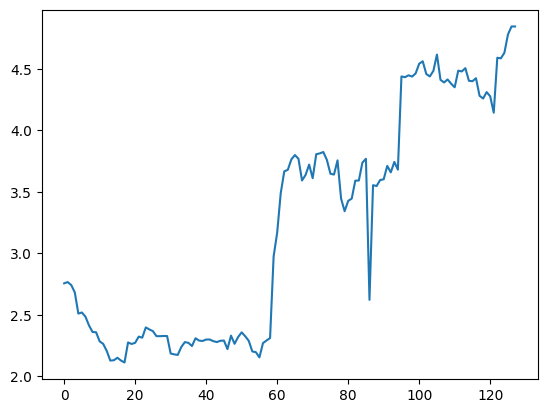

In [74]:
import matplotlib.pyplot as plt
plt.plot(traj_rmsd_min_list)

In [17]:
# show the residue number of the trajectory tick 0
print(u.atoms.residues.resids)

[235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324
 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342
 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360
 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378
 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396
 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414
 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432
 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450
 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468
 469 470 471 472 473 474 475 476 477 478 479 480 48

In [61]:
prot_traj = u.select_atoms('protein and backbone and resid 236-499')
prot_comp = u_query.select_atoms('protein and backbone and resid 1-264')
coords_comp = prot_comp.positions
# print(len(prot_comp.atoms.residues.resids))
# print(len(prot_comp.atoms.resnames))
# print(prot_comp.atoms.names)
# print(prot_comp.atoms.resnames)
rmsd_list = []
for ts in tqdm(u.trajectory):
    coords = prot_traj.positions
    atoms = prot_traj.atoms
    assert np.sum([i != j for i, j in zip(atoms.names, prot_comp.atoms.names)]) == 0
    rmsd_ = rmsd(coords, coords_comp, superposition=True)
    rmsd_list.append(rmsd_)
    # rmsd = align.alignto(prot_traj, prot_comp)
    # print(rmsd)
print(np.min(rmsd_list))

100%|██████████| 1000/1000 [00:00<00:00, 3881.54it/s]

5.320643468243019


In [63]:
rmsd_list


[5.53021725957458,
 5.497096227221243,
 5.395073570597089,
 5.508089579541278,
 5.488289608328159,
 5.5016039991174805,
 5.374150459612492,
 5.320643468243019,
 5.394134843376353,
 5.445605370258645,
 5.5121048901745535,
 5.669432839365748,
 5.481382235769632,
 5.556739187504671,
 5.638049031266838,
 5.451189459421185,
 5.561584089657157,
 5.524933997533228,
 5.501618272400406,
 5.5372674673661955,
 5.554586147769736,
 5.460023417261919,
 5.686182387088181,
 5.53788710438947,
 5.5842808934804955,
 5.504969474936057,
 5.622307430068462,
 5.6043245340106935,
 5.48181301646141,
 5.692426522729531,
 5.5439240668656495,
 5.55676534949395,
 5.7190580176748975,
 5.545591878803806,
 5.6972199880044805,
 5.608802260239526,
 5.660620948349131,
 5.770358867726879,
 5.790907658254564,
 5.822501210605914,
 5.629365228027467,
 5.590037148027608,
 5.653699355166337,
 5.624859479982352,
 5.727320518384103,
 5.760384328830507,
 5.658637631061394,
 5.717334704623398,
 5.8055448300828285,
 5.440109879998

In [37]:
len(prot_comp.atoms.residues.resids)

263

#### DE Shaw Trajectory Analysis

In [1]:
import pyemma
import MDAnalysis as mda
import os
import numpy as np
from MDAnalysis.analysis.dihedrals import Dihedral
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm

In [98]:
# interpolation conponents 0
data_path_1 = './2f4j.pdb'
data_path_2 = './3k5v_fixed.pdb'

phi_list = []
psi_list = []

u_ = mda.Universe(data_path_1)
u_select = u_.select_atoms('protein and backbone and resid 237-498')
phi_ags = [res.phi_selection() for res in u_select.residues]
phi = Dihedral(phi_ags).run()
phi_angles = phi.angles[0]
psi_ags = [res.psi_selection() for res in u_select.residues]
psi = Dihedral(psi_ags).run()
psi_angles = psi.angles[0]

phi_list.append(phi_angles)
psi_list.append(psi_angles)

u_ = mda.Universe(data_path_2)
u_select = u_.select_atoms('protein and backbone and resid 256-517')
phi_ags = [res.phi_selection() for res in u_select.residues]
phi = Dihedral(phi_ags).run()
phi_angles = phi.angles[0]
psi_ags = [res.psi_selection() for res in u_select.residues]
psi = Dihedral(psi_ags).run()
psi_angles = psi.angles[0]

phi_list.append(phi_angles)
psi_list.append(psi_angles)

phi_list = np.asarray(phi_list)
psi_list = np.asarray(psi_list)

conponents_interpolate_rcsb = np.concatenate([phi_list, psi_list], axis=1)
conponents_interpolate_sin_rcsb = np.sin(conponents_interpolate_rcsb * np.pi / 180)
conponents_interpolate_cos_rcsb = np.cos(conponents_interpolate_rcsb * np.pi / 180)
conponents_interpolate_rcsb = np.concatenate([conponents_interpolate_sin_rcsb, 
                                                  conponents_interpolate_cos_rcsb], axis=1)
print(conponents_interpolate_rcsb.shape)

(2, 1048)


In [96]:
phi_list[0].shape, phi_list[1].shape

((262,), (1, 263))

In [4]:
# interpolation conponents 1
data_path = []
for i in range(128):
    data_path.append(f'/home/zychen/Desktop/deshaw_traj_1704_pdbs_clean_interpolation_pdb/aux_{i}.pdb')

phi_list = []
psi_list = []
for p_ in data_path:
    u_ = mda.Universe(p_)
    u_select = u_.select_atoms('protein and backbone and resid 145-170')
    phi_ags = [res.phi_selection() for res in u_select.residues]
    phi = Dihedral(phi_ags).run()
    phi_angles = phi.angles[0]
    psi_ags = [res.psi_selection() for res in u_select.residues]
    psi = Dihedral(psi_ags).run()
    psi_angles = psi.angles[0]

    phi_list.append(phi_angles)
    psi_list.append(psi_angles)
phi_list = np.array(phi_list)
psi_list = np.array(psi_list)
conponents_interpolate = np.concatenate([phi_list, psi_list], axis=1)
conponents_interpolate_sin = np.sin(conponents_interpolate * np.pi / 180)
conponents_interpolate_cos = np.cos(conponents_interpolate * np.pi / 180)
conponents_interpolate = np.concatenate([conponents_interpolate_sin, conponents_interpolate_cos], axis=1)
print(conponents_interpolate.shape)

/home/zychen/anaconda3/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:447: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/home/zychen/anaconda3/lib/python3.9/site-packages/MDAnalysis/analysis/dihedrals.py:315: DeprecationWarning: The `angle` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.angles` instead
  warnings.warn(wmsg, DeprecationWarning)


(128, 104)


In [8]:
# interpolation conponents 2
data_path = []
for i in range(1024):
    data_path.append(f'/home/zychen/Desktop/interpolation_38_34317/pdb/aux_{i}.pdb')

phi_list = []
psi_list = []
for p_ in data_path:
    u_ = mda.Universe(p_)
    u_select = u_.select_atoms('protein and backbone and resid 145-170')
    phi_ags = [res.phi_selection() for res in u_select.residues]
    phi = Dihedral(phi_ags).run()
    phi_angles = phi.angles[0]
    psi_ags = [res.psi_selection() for res in u_select.residues]
    psi = Dihedral(psi_ags).run()
    psi_angles = psi.angles[0]

    phi_list.append(phi_angles)
    psi_list.append(psi_angles)
phi_list = np.array(phi_list)
psi_list = np.array(psi_list)
conponents_interpolate_38_34317 = np.concatenate([phi_list, psi_list], axis=1)
conponents_interpolate_sin_38_34317 = np.sin(conponents_interpolate_38_34317 * np.pi / 180)
conponents_interpolate_cos_38_34317 = np.cos(conponents_interpolate_38_34317 * np.pi / 180)
conponents_interpolate_38_34317 = np.concatenate([conponents_interpolate_sin_38_34317, 
                                                  conponents_interpolate_cos_38_34317], axis=1)
print(conponents_interpolate_38_34317.shape)

(1024, 104)


In [ ]:
# interpolation conponents 3
data_path = []
for i in range(1024):
    data_path.append(f'/home/zychen/Desktop/interpolation_38_71701/pdb/aux_{i}.pdb')

phi_list = []
psi_list = []
for p_ in data_path:
    u_ = mda.Universe(p_)
    u_select = u_.select_atoms('protein and backbone and resid 145-170')
    phi_ags = [res.phi_selection() for res in u_select.residues]
    phi = Dihedral(phi_ags).run()
    phi_angles = phi.angles[0]
    psi_ags = [res.psi_selection() for res in u_select.residues]
    psi = Dihedral(psi_ags).run()
    psi_angles = psi.angles[0]

    phi_list.append(phi_angles)
    psi_list.append(psi_angles)
phi_list = np.array(phi_list)
psi_list = np.array(psi_list)
conponents_interpolate_38_71701 = np.concatenate([phi_list, psi_list], axis=1)
conponents_interpolate_sin_38_71701 = np.sin(conponents_interpolate_38_71701 * np.pi / 180)
conponents_interpolate_cos_38_71701 = np.cos(conponents_interpolate_38_71701 * np.pi / 180)
conponents_interpolate_38_71701 = np.concatenate([conponents_interpolate_sin_38_71701, 
                                                  conponents_interpolate_cos_38_71701], axis=1)
print(conponents_interpolate_38_71701.shape)

(1024, 104)


In [10]:
# interpolation conponents 4
data_path = []
for i in range(1024):
    data_path.append(f'/home/zychen/Desktop/interpolation_34317_71701/pdb/aux_{i}.pdb')

phi_list = []
psi_list = []
for p_ in data_path:
    u_ = mda.Universe(p_)
    u_select = u_.select_atoms('protein and backbone and resid 145-170')
    phi_ags = [res.phi_selection() for res in u_select.residues]
    phi = Dihedral(phi_ags).run()
    phi_angles = phi.angles[0]
    psi_ags = [res.psi_selection() for res in u_select.residues]
    psi = Dihedral(psi_ags).run()
    psi_angles = psi.angles[0]

    phi_list.append(phi_angles)
    psi_list.append(psi_angles)
phi_list = np.array(phi_list)
psi_list = np.array(psi_list)
conponents_interpolate_34317_71701 = np.concatenate([phi_list, psi_list], axis=1)
conponents_interpolate_sin_34317_71701 = np.sin(conponents_interpolate_34317_71701 * np.pi / 180)
conponents_interpolate_cos_34317_71701 = np.cos(conponents_interpolate_34317_71701 * np.pi / 180)
conponents_interpolate_34317_71701 = np.concatenate([conponents_interpolate_sin_34317_71701, 
                                                  conponents_interpolate_cos_34317_71701], axis=1)
print(conponents_interpolate_34317_71701.shape)

(1024, 104)


In [11]:
# interpolation conponents 5
data_path = []
for i in range(1024):
    data_path.append(f'/home/zychen/Desktop/interpolation_38_62766/pdb/aux_{i}.pdb')

phi_list = []
psi_list = []
for p_ in data_path:
    u_ = mda.Universe(p_)
    u_select = u_.select_atoms('protein and backbone and resid 145-170')
    phi_ags = [res.phi_selection() for res in u_select.residues]
    phi = Dihedral(phi_ags).run()
    phi_angles = phi.angles[0]
    psi_ags = [res.psi_selection() for res in u_select.residues]
    psi = Dihedral(psi_ags).run()
    psi_angles = psi.angles[0]

    phi_list.append(phi_angles)
    psi_list.append(psi_angles)
phi_list = np.array(phi_list)
psi_list = np.array(psi_list)
conponents_interpolate_38_62766 = np.concatenate([phi_list, psi_list], axis=1)
conponents_interpolate_sin_38_62766 = np.sin(conponents_interpolate_38_62766 * np.pi / 180)
conponents_interpolate_cos_38_62766 = np.cos(conponents_interpolate_38_62766 * np.pi / 180)
conponents_interpolate_38_62766 = np.concatenate([conponents_interpolate_sin_38_62766, 
                                                  conponents_interpolate_cos_38_62766], axis=1)
print(conponents_interpolate_38_62766.shape)

(1024, 104)


In [74]:
# interpolation conponents 6
data_path = []
for i in range(1024):
    data_path.append(f'/home/zychen/Desktop/interpolation_1opj_2f4j/pdb/aux_{i}.pdb')

phi_list = []
psi_list = []
for p_ in data_path:
    u_ = mda.Universe(p_)
    u_select = u_.select_atoms('protein and backbone and resid 2-263')
    phi_ags = [res.phi_selection() for res in u_select.residues]
    phi = Dihedral(phi_ags).run()
    phi_angles = phi.angles[0]
    psi_ags = [res.psi_selection() for res in u_select.residues]
    psi = Dihedral(psi_ags).run()
    psi_angles = psi.angles[0]

    phi_list.append(phi_angles)
    psi_list.append(psi_angles)
phi_list = np.array(phi_list)
psi_list = np.array(psi_list)
conponents_interpolate_1opj_2f4j = np.concatenate([phi_list, psi_list], axis=1)
conponents_interpolate_sin_1opj_2f4j = np.sin(conponents_interpolate_1opj_2f4j * np.pi / 180)
conponents_interpolate_cos_1opj_2f4j = np.cos(conponents_interpolate_1opj_2f4j * np.pi / 180)
conponents_interpolate_1opj_2f4j = np.concatenate([conponents_interpolate_sin_1opj_2f4j, 
                                                  conponents_interpolate_cos_1opj_2f4j], axis=1)
print(conponents_interpolate_1opj_2f4j.shape)

(1024, 1048)


In [100]:
### deshaw long trajectory conponents

traj_path_list_1 = []
template_path_1 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-imatinib-binding-G0-5559010-main1-no-water/template.pdb'
traj_dir_1 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-imatinib-binding-G0-5559010-main1-no-water/natcomm2023-imatinib-binding-G0-5559010-main1-no-water'
for file in os.listdir(traj_dir_1):
    if file.endswith('.dcd'):
        traj_path_list_1.append(os.path.join(traj_dir_1, file))

traj_path_list_2 = []
template_path_2 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-imatinib-binding-G0-5558993-main2-no-water/template.pdb'
traj_dir_2 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-imatinib-binding-G0-5558993-main2-no-water/natcomm2023-imatinib-binding-G0-5558993-main2-no-water'
for file in os.listdir(traj_dir_2):
    if file.endswith('.dcd'):
        traj_path_list_2.append(os.path.join(traj_dir_2, file))

conponents_list = []
for traj_path_ in tqdm(traj_path_list_1):
    u = mda.Universe(template_path_1, traj_path_)
    prot_traj = u.select_atoms('protein and backbone and resid 237-498') # 380-405 2024.12.18

    phi_ags = [res.phi_selection() for res in prot_traj.residues]
    phi = Dihedral(phi_ags).run()
    phi_angles = phi.angles
    psi_ags = [res.psi_selection() for res in prot_traj.residues]
    psi = Dihedral(psi_ags).run()
    psi_angles = psi.angles
    # print(phi_angles.shape, psi_angles.shape)
    conponents = np.concatenate([phi_angles, psi_angles], axis=1)
    conponents_sin = np.sin(conponents * np.pi / 180)
    conponents_cos = np.cos(conponents * np.pi / 180)
    conponents_1 = np.concatenate([conponents_sin, conponents_cos], axis=1)
    # print(conponents_1.shape)
    conponents_list.append(conponents_1)

for traj_path_ in tqdm(traj_path_list_2):
    u = mda.Universe(template_path_2, traj_path_)
    prot_traj = u.select_atoms('protein and backbone and resid 237-498')

    phi_ags = [res.phi_selection() for res in prot_traj.residues]
    phi = Dihedral(phi_ags).run()
    phi_angles = phi.angles
    psi_ags = [res.psi_selection() for res in prot_traj.residues]
    psi = Dihedral(psi_ags).run()
    psi_angles = psi.angles
    # print(phi_angles.shape, psi_angles.shape)
    conponents = np.concatenate([phi_angles, psi_angles], axis=1)
    conponents_sin = np.sin(conponents * np.pi / 180)
    conponents_cos = np.cos(conponents * np.pi / 180)
    conponents_2 = np.concatenate([conponents_sin, conponents_cos], axis=1)
    # print(conponents_2.shape)
    conponents_list.append(conponents_2)

conponents = np.concatenate(conponents_list, axis=0)
print(conponents.shape)
conponents_p1 = np.concatenate(conponents_list[:100], axis=0)
conponents_p2 = np.concatenate(conponents_list[100:], axis=0)
print(conponents_p1.shape, conponents_p2.shape, np.sum(conponents_p1 == conponents_p2))

100%|██████████| 100/100 [01:34<00:00,  1.06it/s]


(199994, 1048)
(99997, 1048) (99997, 1048) 0


In [101]:
cluster = pyemma.coordinates.cluster_kmeans(conponents_p1, k=2, max_iter=50)

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

In [102]:
tica_fitted = pyemma.coordinates.tica(conponents_p1, lag=5, dim=2)
# tica_fitted = pyemma.coordinates.pca(conponents_p1, dim=2)
deshaw_traj_data_p1 = tica_fitted.get_output()[0]
# interpolate_data = tica_fitted.transform(conponents_interpolate)
# cluster_center_data = tica_fitted.transform(cluster.clustercenters)
# deshaw_traj_data_p2 = tica_fitted.transform(conponents_p2)
# interpolate_data_38_34317 = tica_fitted.transform(conponents_interpolate_38_34317)
# interpolate_data_38_71701 = tica_fitted.transform(conponents_interpolate_38_71701)
# interpolate_data_34317_71701 = tica_fitted.transform(conponents_interpolate_34317_71701)
# interpolate_data_38_62766 = tica_fitted.transform(conponents_interpolate_38_62766)
interpolate_data_rcsb = tica_fitted.transform(conponents_interpolate_rcsb)
interpolate_data_1opj_2f4j = tica_fitted.transform(conponents_interpolate_1opj_2f4j)

calculate covariances:   0%|          | 0/4 [00:00<?, ?it/s]

getting output of TICA:   0%|          | 0/4 [00:00<?, ?it/s]

(20,)
(2, 16)
(16, 2)


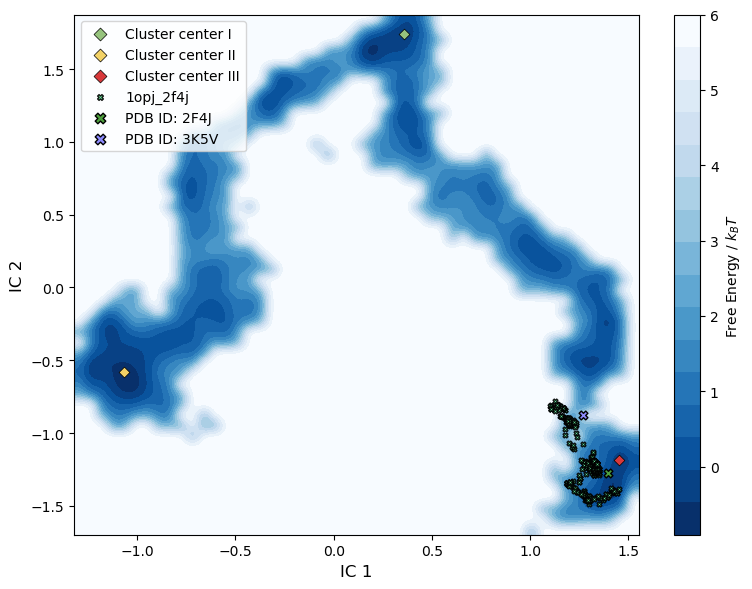

In [ ]:
# 创建 2D 直方图
from matplotlib.pyplot import tick_params
# from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import get_cmap

h_, xedge_, yedge_ = np.histogram2d(
    deshaw_traj_data_p1[:, 0], 
    deshaw_traj_data_p1[:, 1], 
    bins=50, density=True
)


# 找出最大密度 bin 的索引
num_top_bins = 20  # 选择最密集的前 5 个 bin
top_bins = np.unravel_index(np.argsort(h_, axis=None)[-num_top_bins:], h_.shape)
print(top_bins[0].shape)
bin_overlay = 40
selected_top_bins = [[top_bins[0][0]], [top_bins[1][0]]]
for bin_x, bin_y in zip(top_bins[0], top_bins[1]):
    if (np.abs(bin_x - top_bins[0][0]) + np.abs(bin_y - top_bins[1][0])) <= bin_overlay:
        continue
    else:
        selected_top_bins[0].append(bin_x)
        selected_top_bins[1].append(bin_y)
top_bins = np.asarray(selected_top_bins)
print(top_bins.shape)
# 根据 bin 范围筛选数据点
top_points = []
top_points_index = []
for row, col in zip(top_bins[0], top_bins[1]):
    x_min, x_max = xedge_[row], xedge_[row + 1]
    y_min, y_max = yedge_[col], yedge_[col + 1]
    
    # 筛选数据点 & get the index in the original data
    for i, (x, y) in enumerate(zip(deshaw_traj_data_p1[:, 0], deshaw_traj_data_p1[:, 1])):
        if x >= x_min and x < x_max and y >= y_min and y < y_max:
            top_points.append([x, y])
            top_points_index.append(i)
            break
top_points = np.array(top_points)
print(top_points.shape)
# points_in_bin = deshaw_traj_data_p1[
#         (deshaw_traj_data_p1[:, 0] >= x_min) & (deshaw_traj_data_p1[:, 0] < x_max) &
#         (deshaw_traj_data_p1[:, 1] >= y_min) & (deshaw_traj_data_p1[:, 1] < y_max)
#     ]
# top_points.extend(points_in_bin)
# top_points = np.array(top_points)


# 对数据进行 -log10 处理，避免对数计算时 log(0) 出现问题
hist_nlog10 = -np.log10(h_ + 1e-6)
hist_nlog10 = np.where(h_ == 0, np.max(hist_nlog10), hist_nlog10)

# 绘制等高线图和散点图
plt.figure(figsize=(8, 6))
# plt.xlim(-1.5, 2.5)
# plt.ylim(-2.5, 3.0)
# colors = [(1, 0, 0), (0.95, 1.0, 0.95),]  # 白色到红色
# n_bins = 16  # 使用的颜色数量
# cmap_name = 'white_red'
# cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# 使用 imshow 绘制背景
im = plt.imshow(
    hist_nlog10.T,                    # 转置以匹配直方图的坐标系统
    cmap=get_cmap('Blues_r', 16),  # 使用 'viridis' 优化配色
    # cmap=cm,
    interpolation='bicubic',          # 优化插值
    extent=[xedge_[0], xedge_[-1], yedge_[0], yedge_[-1]],  # 对齐 scatter 的坐标范围
    origin='lower',                   # 确保坐标原点一致
    aspect='auto'                     # 保持等比例
)
cbar = plt.colorbar(im, label=r"Free Energy / $k_{B}T$",)
                    

# # 叠加等高线
# contour = plt.contour(
#     np.linspace(xedge_[0], xedge_[-1], h_.shape[0]),
#     np.linspace(yedge_[0], yedge_[-1], h_.shape[1]),
#     hist_nlog10,
#     levels=15,
#     cmap='cool',                      # 调整等高线颜色
#     linewidths=0.8
# )
# plt.clabel(contour, inline=True, fontsize=8, fmt="%.2f")  # 添加标签

# 叠加散点
                                                                                                                                                                                                                                               

# # 叠加插值数据
# plt.scatter(
#     interpolate_data[:, 0], interpolate_data[:, 1], 
#     color='orange', s=10, alpha=0.5, label='interpolation data'
# )

# # 叠加插值start数据
# plt.scatter(
#     interpolate_data[0, 0], interpolate_data[0, 1], 
#     color='red', s=20, alpha=0.8, marker='*',
# )

# # 叠加插值end数据
# plt.scatter(
#     interpolate_data[-1, 0], interpolate_data[-1, 1], 
#     color='green', s=20, alpha=0.8, marker='*',
# )

# MD cluster center
# top_points_index
# 38 ---> 0
# 34317 ---> -2
# 71701 ---> 2
# 62766 ---> 6
plt.scatter(x=top_points[0, 0], y=top_points[0, 1], color='#96C37D', marker='D',
            s=30, label='Cluster center I', edgecolors='black', linewidths=0.5) # 38
plt.scatter(x=top_points[13, 0], y=top_points[13, 1], color='#F3D266', marker='D',
            s=30, label='Cluster center II', edgecolors='black', linewidths=0.5) # 34317
plt.scatter(x=top_points[8, 0], y=top_points[8, 1], color='#D8383A', marker='D',
            s=30, label='Cluster center III', edgecolors='black', linewidths=0.5) # 71701
# # plt.scatter(x=top_points[6, 0], y=top_points[6, 1], color='#8E8BFE', marker='D',
# #             s=20, label='Cluster IV', edgecolors='black', linewidths=0.5) # 62766

# for kk_ in range(len(top_points)):
#     plt.scatter(x=top_points[kk_, 0], y=top_points[kk_, 1], marker='D',
#                 s=30, label=f'Cluster center {kk_}', edgecolors='black', linewidths=0.5) # 38
#     plt.text(top_points[kk_, 0], top_points[kk_, 1], f'{kk_}', fontsize=8)
"""
# 叠加插值数据
p_ = 8
plt.scatter(
    interpolate_data_38_34317[::p_, 0], interpolate_data_38_34317[::p_, 1], 
    color='yellow', s=20, alpha=0.9, label='Interpolated I-II',
    edgecolors='black', linewidths=0.8, marker='X', rasterized=True
)
plt.scatter(
    interpolate_data_38_71701[::p_, 0], interpolate_data_38_71701[::p_, 1], 
    color='#D8383A', s=20, alpha=0.9, label='Interpolated I-III',
    edgecolors='black', linewidths=0.8, marker='X', rasterized=True
)
plt.scatter(
    interpolate_data_34317_71701[::p_, 0], interpolate_data_34317_71701[::p_, 1], 
    color='orange', s=20, alpha=0.9, label='Interpolated II-III',
    edgecolors='black', linewidths=0.8, marker='X', rasterized=True
)
# plt.scatter(
#     interpolate_data_38_62766[:, 0], interpolate_data_38_62766[:, 1], 
#     color='orange', s=10, alpha=0.5, label='Interpolated from I to IV'
# )

# # 叠加插值start数据
# plt.scatter(
#     interpolate_data_38_34317[0, 0], interpolate_data_38_34317[0, 1], 
#     color='red', s=20, alpha=0.8, marker='*',
# )

# # 叠加插值end数据
# plt.scatter(
#     interpolate_data_38_34317[-1, 0], interpolate_data_38_34317[-1, 1], 
#     color='green', s=20, alpha=0.8, marker='*',
# )

# 在图上标出密度最高的点
# plt.scatter(x=top_points[:, 0], y=top_points[:, 1], color='pink', 
#             s=10, label='High-Density Points')



"""
plt.scatter(
    interpolate_data_1opj_2f4j[::2, 0], interpolate_data_1opj_2f4j[::2, 1],
    color='#63E398', s=12, alpha=0.9, label='1opj_2f4j',
    edgecolors='black', linewidths=1.0, marker='X'
)


plt.scatter(
    interpolate_data_rcsb[0, 0], interpolate_data_rcsb[0, 1],
    color='#4E9F3D', s=40, alpha=1.0, label='PDB ID: 2F4J',
    edgecolors='black', linewidths=1.0, marker='X'
)

plt.scatter(
    interpolate_data_rcsb[1, 0], interpolate_data_rcsb[1, 1],
    color='#8E8BFE', s=40, alpha=1.0, label='PDB ID: 3K5V',
    edgecolors='black', linewidths=1.0, marker='X'
)
# 设置标题和轴标签
# plt.title("Conformation", fontsize=14)
plt.xlabel("IC 1", fontsize=12)
plt.ylabel("IC 2", fontsize=12)
plt.legend(fontsize=10, loc='upper left', 
           ncol=1, markerscale=1.2,) # scatterpoints=1,

# # 添加颜色条
# plt.colorbar(aspect=40,
#              )

# 显示图像
plt.tight_layout()
# plt.savefig('./DESHAW_traj_data_2D_MD.png', dpi=1200)
plt.show()

In [116]:
top_points_index[0], top_points_index[13], top_points_index[8]

(34996, 61011, 4288)

(20,)
(2, 15)
(15, 2)


/tmp/ipykernel_1723147/2058594139.py:66: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=get_cmap('Blues_r', 16),  # 使用 'viridis' 优化配色


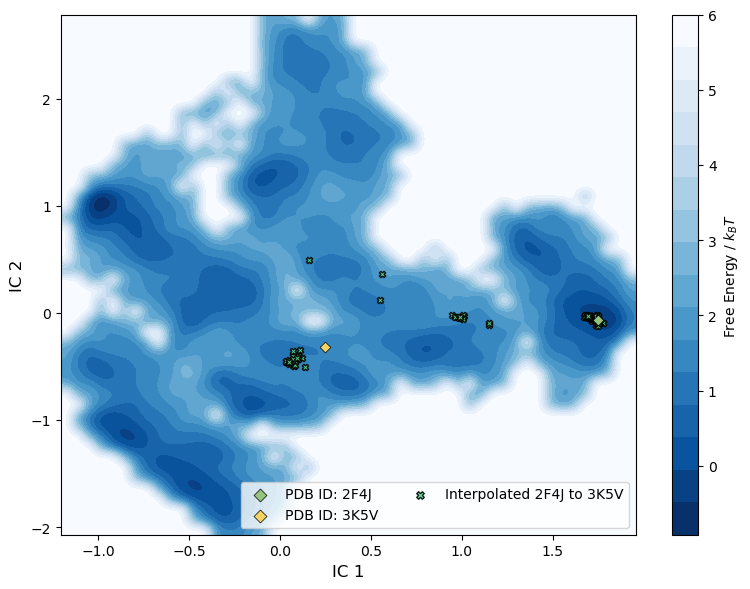

In [134]:
# 创建 2D 直方图
from matplotlib.pyplot import tick_params
# from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import get_cmap

h_, xedge_, yedge_ = np.histogram2d(
    deshaw_traj_data_p1[:, 0], 
    deshaw_traj_data_p1[:, 1], 
    bins=50, density=True
)


# 找出最大密度 bin 的索引
num_top_bins = 20  # 选择最密集的前 5 个 bin
top_bins = np.unravel_index(np.argsort(h_, axis=None)[-num_top_bins:], h_.shape)
print(top_bins[0].shape)
bin_overlay = 40
selected_top_bins = [[top_bins[0][0]], [top_bins[1][0]]]
for bin_x, bin_y in zip(top_bins[0], top_bins[1]):
    if (np.abs(bin_x - top_bins[0][0]) + np.abs(bin_y - top_bins[1][0])) <= bin_overlay:
        continue
    else:
        selected_top_bins[0].append(bin_x)
        selected_top_bins[1].append(bin_y)
top_bins = np.asarray(selected_top_bins)
print(top_bins.shape)
# 根据 bin 范围筛选数据点
top_points = []
top_points_index = []
for row, col in zip(top_bins[0], top_bins[1]):
    x_min, x_max = xedge_[row], xedge_[row + 1]
    y_min, y_max = yedge_[col], yedge_[col + 1]
    
    # 筛选数据点 & get the index in the original data
    for i, (x, y) in enumerate(zip(deshaw_traj_data_p1[:, 0], deshaw_traj_data_p1[:, 1])):
        if x >= x_min and x < x_max and y >= y_min and y < y_max:
            top_points.append([x, y])
            top_points_index.append(i)
            break
top_points = np.array(top_points)
print(top_points.shape)
#     points_in_bin = deshaw_traj_data_p1[
#         (deshaw_traj_data_p1[:, 0] >= x_min) & (deshaw_traj_data_p1[:, 0] < x_max) &
#         (deshaw_traj_data_p1[:, 1] >= y_min) & (deshaw_traj_data_p1[:, 1] < y_max)
#     ]
#     top_points.extend(points_in_bin)
# top_points = np.array(top_points)


# 对数据进行 -log10 处理，避免对数计算时 log(0) 出现问题
hist_nlog10 = -np.log10(h_ + 1e-6)
hist_nlog10 = np.where(h_ == 0, np.max(hist_nlog10), hist_nlog10)

# 绘制等高线图和散点图
plt.figure(figsize=(8, 6))
# plt.xlim(-1.5, 2.5)
# plt.ylim(-2.5, 3.0)
# colors = [(1, 0, 0), (0.95, 1.0, 0.95),]  # 白色到红色
# n_bins = 16  # 使用的颜色数量
# cmap_name = 'white_red'
# cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# 使用 imshow 绘制背景
im = plt.imshow(
    hist_nlog10.T,                    # 转置以匹配直方图的坐标系统
    cmap=get_cmap('Blues_r', 16),  # 使用 'viridis' 优化配色
    # cmap=cm,
    interpolation='bicubic',          # 优化插值
    extent=[xedge_[0], xedge_[-1], yedge_[0], yedge_[-1]],  # 对齐 scatter 的坐标范围
    origin='lower',                   # 确保坐标原点一致
    aspect='auto'                     # 保持等比例
)
cbar = plt.colorbar(im, label=r"Free Energy / $k_{B}T$",)
                    

# # 叠加等高线
# contour = plt.contour(
#     np.linspace(xedge_[0], xedge_[-1], h_.shape[0]),
#     np.linspace(yedge_[0], yedge_[-1], h_.shape[1]),
#     hist_nlog10,
#     levels=15,
#     cmap='cool',                      # 调整等高线颜色
#     linewidths=0.8
# )
# plt.clabel(contour, inline=True, fontsize=8, fmt="%.2f")  # 添加标签

# 叠加散点
# plt.scatter(
#     deshaw_traj_data_p1[:, 0], deshaw_traj_data_p1[:, 1], 
#     color='orange', s=3, alpha=0.009, label='1 data'
# )

# # 叠加插值数据
# plt.scatter(
#     interpolate_data[:, 0], interpolate_data[:, 1], 
#     color='orange', s=10, alpha=0.5, label='interpolation data'
# )

# # 叠加插值start数据
# plt.scatter(
#     interpolate_data[0, 0], interpolate_data[0, 1], 
#     color='red', s=20, alpha=0.8, marker='*',
# )

# # 叠加插值end数据
# plt.scatter(
#     interpolate_data[-1, 0], interpolate_data[-1, 1], 
#     color='green', s=20, alpha=0.8, marker='*',
# )

# MD cluster center
# top_points_index
# 38 ---> 0
# 34317 ---> -2
# 71701 ---> 2
# 62766 ---> 6
# plt.scatter(x=top_points[0, 0], y=top_points[0, 1], color='#96C37D', marker='D',
#             s=30, label='Cluster center I', edgecolors='black', linewidths=0.5) # 38
# plt.scatter(x=top_points[-2, 0], y=top_points[-2, 1], color='#F3D266', marker='D',
#             s=30, label='Cluster center II', edgecolors='black', linewidths=0.5) # 34317
# plt.scatter(x=top_points[2, 0], y=top_points[2, 1], color='#D8383A', marker='D',
#             s=30, label='Cluster center III', edgecolors='black', linewidths=0.5) # 71701
# plt.scatter(x=top_points[6, 0], y=top_points[6, 1], color='#8E8BFE', marker='D',
#             s=20, label='Cluster IV', edgecolors='black', linewidths=0.5) # 62766


# 叠加插值数据
# p_ = 8
# plt.scatter(
#     interpolate_data_38_34317[::p_, 0], interpolate_data_38_34317[::p_, 1], 
#     color='yellow', s=20, alpha=0.9, label='Interpolated I-II',
#     edgecolors='black', linewidths=0.8, marker='X'
# )
# plt.scatter(
#     interpolate_data_38_71701[::p_, 0], interpolate_data_38_71701[::p_, 1], 
#     color='#D8383A', s=20, alpha=0.9, label='Interpolated I-III',
#     edgecolors='black', linewidths=0.8, marker='X'
# )
# plt.scatter(
#     interpolate_data_34317_71701[::p_, 0], interpolate_data_34317_71701[::p_, 1], 
#     color='orange', s=20, alpha=0.9, label='Interpolated II-III',
#     edgecolors='black', linewidths=0.8, marker='X'
# )
# plt.scatter(
#     interpolate_data_38_62766[:, 0], interpolate_data_38_62766[:, 1], 
#     color='orange', s=20, alpha=0.5, label='Interpolated from I to IV'
# )

# # 叠加插值start数据
# plt.scatter(
#     interpolate_data_38_34317[0, 0], interpolate_data_38_34317[0, 1], 
#     color='red', s=20, alpha=0.8, marker='*',
# )

# # 叠加插值end数据
# plt.scatter(
#     interpolate_data_38_34317[-1, 0], interpolate_data_38_34317[-1, 1], 
#     color='green', s=20, alpha=0.8, marker='*',
# )

# 在图上标出密度最高的点
# plt.scatter(x=top_points[:, 0], y=top_points[:, 1], color='pink', 
#             s=10, label='High-Density Points')


# RCSB data
plt.scatter(
    interpolate_data_rcsb[0, 0], interpolate_data_rcsb[0, 1],
    color='#96C37D', s=30, alpha=1.0, label='PDB ID: 2F4J',
    edgecolors='black', linewidths=0.5, marker='D', zorder=10, 
)

plt.scatter(
    interpolate_data_rcsb[1, 0], interpolate_data_rcsb[1, 1],
    color='#F3D266', s=30, alpha=1.0, label='PDB ID: 3K5V',
    edgecolors='black', linewidths=0.5, marker='D', zorder=10
)

plt.scatter(
    interpolate_data_1opj_2f4j[::8, 0], interpolate_data_1opj_2f4j[::8, 1],
    color='#63E398', s=20, alpha=0.9, label='Interpolated 2F4J to 3K5V',
    edgecolors='black', linewidths=1.0, marker='X', zorder=0, rasterized=True
)





# 设置标题和轴标签
# plt.title("Conformation", fontsize=14)
plt.xlabel("IC 1", fontsize=12)
plt.ylabel("IC 2", fontsize=12)
plt.legend(fontsize=10, loc='lower right', 
           ncol=2, markerscale=1.2,) # scatterpoints=1,

# # 添加颜色条
# plt.colorbar(aspect=40,
#              )

# 显示图像
plt.tight_layout()
plt.savefig('./DESHAW_traj_data_2D_RCSB.png', dpi=1200)
plt.show()

In [389]:
top_points_index.sort()
for i in top_points_index:
    print(i, i // 1000, i % 1000)

38 0 38
34313 34 313
34317 34 317
38232 38 232
38241 38 241
38246 38 246
38443 38 443
38457 38 457
39162 39 162
62766 62 766
62795 62 795
62965 62 965
71701 71 701
71774 71 774
71810 71 810


In [366]:
for bin_x, bin_y in zip(top_bins[0], top_bins[1]):
    print(bin_x - top_bins[0][0], bin_y - top_bins[1][0])

0 0
-44 -10
-37 -15
-36 -16
-46 10
-46 12
-42 -11
-3 1
-37 -16
-45 10
-2 1
-1 1
-2 0
-43 -11
-44 11
-44 12
-46 11
-1 0
-45 12
-45 11


In [88]:
8.14317825*9.03

73.53289959749999

In [86]:
#### map two steered MD input pdb 's atom index:
import MDAnalysis as mda
import numpy as np
import os

from alphafold import common

pdb_path_1 = '/home/zychen/Downloads/firefox/0.15_80_10_pH6.5_7r6r_start_noh.genpdb.cpptraj.pdb'
pdb_path_2 = '/home/zychen/Downloads/firefox/0.15_80_10_pH6.5_7r6r_end_noh.genpdb.cpptraj.pdb'

content_dict_1 = {}
with open(pdb_path_1, 'r') as f:
    lines_1 = f.read().splitlines()
ter_num = 0
for l_ in lines_1:
    if l_.startswith('TER'):
        ter_num += 1
    if not ter_num == 2:
        continue
    if l_.startswith('ATOM'):
        residue_index = int(l_[22:26].strip())
        atom_name = l_[12:16].strip()
        if residue_index not in content_dict_1:
            content_dict_1[residue_index] = {}
        content_dict_1[residue_index][atom_name] = l_

content_dict_2 = {}
with open(pdb_path_2, 'r') as f:
    lines_2 = f.read().splitlines()
ter_num = 0
for l_ in lines_2:
    if l_.startswith('TER'):
        ter_num += 1
    if not ter_num == 2:
        continue
    if l_.startswith('ATOM'):
        residue_index = int(l_[22:26].strip())
        atom_name = l_[12:16].strip()
        if residue_index not in content_dict_2:
            content_dict_2[residue_index] = {}
        content_dict_2[residue_index][atom_name] = l_


new_lines_1 = []
new_lines_2 = []

atom_num = 3464
for k_ in content_dict_1:
    common_atom_name = list(set(content_dict_1[k_].keys()) & set(content_dict_2[k_].keys()))
    for atom_name in common_atom_name:
        new_lines_1.append(content_dict_1[k_][atom_name][:7] + f'{atom_num:4d}' + content_dict_1[k_][atom_name][11:])
        new_lines_2.append(content_dict_2[k_][atom_name][:7] + f'{atom_num:4d}' + content_dict_2[k_][atom_name][11:])
        atom_num += 1

with open(f'/home/zychen/Desktop/7r6r_start_hpp_c3.pdb', 'w') as f:
    for l_ in new_lines_1:
        f.write(l_ + '\n')

with open(f'/home/zychen/Desktop/7r6r_end_hpp_c3.pdb', 'w') as f:
    for l_ in new_lines_2:
        f.write(l_ + '\n')

In [43]:
for k_ in content_dict_1:
    if not len(content_dict_1[k_]) == len(content_dict_2[k_]):
        print(k_, content_dict_1[k_], content_dict_2[k_])

37 {'N': 'ATOM    594  N   HIE    37      33.765  -6.542  61.647  1.00  0.00           N  ', 'H': 'ATOM    595  H   HIE    37      32.980  -6.465  61.990  1.00  0.00           H  ', 'CA': 'ATOM    596  CA  HIE    37      34.725  -7.235  62.513  1.00  0.00           C  ', 'HA': 'ATOM    597  HA  HIE    37      35.440  -6.605  62.694  1.00  0.00           H  ', 'CB': 'ATOM    598  CB  HIE    37      34.027  -7.666  63.800  1.00  0.00           C  ', 'HB2': 'ATOM    599  HB2 HIE    37      33.087  -7.819  63.618  1.00  0.00           H  ', 'HB3': 'ATOM    600  HB3 HIE    37      34.400  -8.510  64.099  1.00  0.00           H  ', 'CG': 'ATOM    601  CG  HIE    37      34.159  -6.658  64.888  1.00  0.00           C  ', 'ND1': 'ATOM    602  ND1 HIE    37      35.334  -6.377  65.566  1.00  0.00           N  ', 'CE1': 'ATOM    603  CE1 HIE    37      35.045  -5.479  66.521  1.00  0.00           C  ', 'HE1': 'ATOM    604  HE1 HIE    37      35.660  -5.127  67.123  1.00  0.00           H  ', 'NE

In [45]:
content_dict_1[37].keys()

dict_keys(['N', 'H', 'CA', 'HA', 'CB', 'HB2', 'HB3', 'CG', 'ND1', 'CE1', 'HE1', 'NE2', 'HE2', 'CD2', 'HD2', 'C', 'O'])

In [46]:
content_dict_2[37].keys()

dict_keys(['N', 'H', 'CA', 'HA', 'CB', 'HB2', 'HB3', 'CG', 'ND1', 'HD1', 'CE1', 'HE1', 'NE2', 'HE2', 'CD2', 'HD2', 'C', 'O'])

In [49]:
'H' in list(set(content_dict_1[37].keys()) & set(content_dict_2[37].keys()))

True

/home/zychen/anaconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/zychen/anaconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


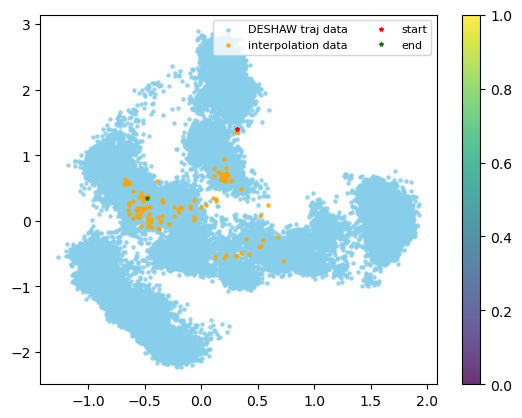

In [157]:
tica_fitted = pyemma.coordinates.tica(conponents_p1, lag=10, dim=2)
# tica_fitted = pyemma.coordinates.pca(conponents, dim=2)
deshaw_traj_data = tica_fitted.get_output()[0]
interpolate_data = tica_fitted.transform(conponents_interpolate)

color_ticks = np.arange(0, deshaw_traj_data.shape[0], 1)
plt.scatter(deshaw_traj_data[:, 0], deshaw_traj_data[:, 1], color='skyblue',
            # c=color_ticks, cmap='viridis', 
            s=5, alpha=0.8, label='DESHAW traj data')
# plt.plot(deshaw_traj_data[:, 0], deshaw_traj_data[:, 1], 'o', alpha=0.8,
#          label='DESHAW traj data', color='skyblue', markersize=5)
plt.scatter(interpolate_data[:, 0], interpolate_data[:, 1], color='orange',
            # c=np.arange(0, interpolate_data.shape[0], 1), cmap='viridis', 
            s=5, alpha=0.8, label='interpolation data')

# plt.plot(interpolate_data[:, 0], interpolate_data[:, 1], 'o', alpha=0.8,
#          label='interpolation data', color='orange', markersize=5)
plt.plot(interpolate_data[0, 0], interpolate_data[0, 1], '*', color='red',
         markersize=3, label='start')
plt.plot(interpolate_data[-1, 0], interpolate_data[-1, 1], '*', color='green',
         markersize=3, label='end')
plt.colorbar()
plt.legend(ncol=2, loc='upper right', fontsize=8)
plt.show()

#### RMSD calculation

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms

# 加载拓扑结构和轨迹文件
u = mda.Universe('topology_file.pdb', 'trajectory_file.xtc')

# 选择蛋白质原子
protein = u.select_atoms('protein')

# 选择参考帧（通常是第一帧）
ref = mda.Universe('topology_file.pdb')
ref_protein = ref.select_atoms('protein')

# 初始化 RMSD 分析
R = rms.RMSD(protein, ref_protein, select='backbone')
R.run()

# 打印结果
import numpy as np
time = u.trajectory.times
rmsd = R.rmsd.T  # transpose makes it easier for plotting
print("时间（ps）: ", time)
print("RMSD（Å）: ", rmsd[2])

# 可以选择将结果绘制为图表
import matplotlib.pyplot as plt
plt.plot(time, rmsd[2])
plt.xlabel("时间 (ps)")
plt.ylabel("RMSD (Å)")
plt.show()

In [3]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms
import numpy as np
import pickle as pkl
import concurrent
import os

In [4]:
rmsd_dict = {}

In [ ]:
traj_path_list_1 = []
traj_dir_1 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G1-no-water/natcomm2023-short-imatinib-G1-no-water'
template_path_1 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G1-no-water/template.pdb'
for file in os.listdir(traj_dir_1):
    if file.endswith('.dcd'):
        traj_path_list_1.append(os.path.join(traj_dir_1, file))
print('\n'.join(traj_path_list_1))

traj_path_list_2 = []
traj_dir_2 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G2-no-water/natcomm2023-short-imatinib-G2-no-water'
template_path_2 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G2-no-water/template.pdb'
for file in os.listdir(traj_dir_2):
    if file.endswith('.dcd'):
        traj_path_list_2.append(os.path.join(traj_dir_2, file))
print('\n'.join(traj_path_list_2))

traj_path_list_3 = []
traj_dir_3 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G3-no-water/natcomm2023-short-imatinib-G3-no-water'
template_path_3 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G3-no-water/template.pdb'
for file in os.listdir(traj_dir_3):
    if file.endswith('.dcd'):
        traj_path_list_3.append(os.path.join(traj_dir_3, file))
print('\n'.join(traj_path_list_3))

traj_path_list_4 = []
traj_dir_4 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G4-no-water/natcomm2023-short-imatinib-G4-no-water'
template_path_4 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G4-no-water/template.pdb'
for file in os.listdir(traj_dir_4):
    if file.endswith('.dcd'):
        traj_path_list_4.append(os.path.join(traj_dir_4, file))
print('\n'.join(traj_path_list_4))

traj_path_list_5 = []
template_path_5 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-imatinib-binding-G0-5559010-main1-no-water/template.pdb'
traj_dir_5 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-imatinib-binding-G0-5559010-main1-no-water/natcomm2023-imatinib-binding-G0-5559010-main1-no-water'
for file in os.listdir(traj_dir_5):
    if file.endswith('.dcd'):
        traj_path_list_5.append(os.path.join(traj_dir_5, file))

traj_path_list_6 = []
template_path_6 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-imatinib-binding-G0-5558993-main2-no-water/template.pdb'
traj_dir_6 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-imatinib-binding-G0-5558993-main2-no-water/natcomm2023-imatinib-binding-G0-5558993-main2-no-water'
for file in os.listdir(traj_dir_6):
    if file.endswith('.dcd'):
        traj_path_list_6.append(os.path.join(traj_dir_6, file))

def concurrent_rmsd_calculate(
    k_, 
):  
    print(f'Processing {k_} ...')
    ref_protein_path_ = f'/home/zychen/Desktop/interpolation_1opj_2f4j/pdb/aux_{k_}.pdb'
    ref = mda.Universe(ref_protein_path_)
    ref_protein = ref.select_atoms('protein and backbone and resid 149-169') # 145-170

    rmsd_list = []
    for template_path_, traj_path_list_ in zip([template_path_5, template_path_6, template_path_1, 
                                                template_path_2, template_path_3, template_path_4,],
                                               [traj_path_list_5, traj_path_list_6, traj_path_list_1, 
                                                traj_path_list_2, traj_path_list_3, traj_path_list_4,]):
        traj_path_list_.sort()
        for i_traj, tmp_traj_path in enumerate(traj_path_list_):
            u = mda.Universe(template_path_, tmp_traj_path)
            prot_traj = u.select_atoms('protein and backbone and resid 384-404')
            R = rms.RMSD(prot_traj, ref_protein, select='backbone')
            R.run()
            rmsd = R.rmsd.T  # transpose makes it easier for plotting
            rmsd_list.extend(rmsd[2])
    return k_, rmsd_list

with concurrent.futures.ThreadPoolExecutor(max_workers=32) as executor:
    for k_, rmsd_list in executor.map(concurrent_rmsd_calculate, range(1024)):
        rmsd_dict[k_] = rmsd_list

# for k_ in range(0, 1024, 1):
#     print(f'Processing {k_} ...')
#     # for k_ in tqdm(range(128)):
#     example_rmsd_list_all = []
#     if not k_ in rmsd_dict:
#         rmsd_dict[k_] = []

#     ref = mda.Universe(f'/home/zychen/Desktop/interpolation_1opj_2f4j/pdb/aux_{k_}.pdb')
#     ref_protein = ref.select_atoms('protein and backbone and resid 149-169') # 145-170
   
#     rmsd_list = []
#     for template_path_, traj_path_list_ in zip([template_path_5, template_path_6, template_path_1, template_path_2, template_path_3, template_path_4,], 
#                                                [traj_path_list_5, traj_path_list_6, traj_path_list_1, traj_path_list_2, traj_path_list_3, traj_path_list_4,]):
#     # for template_path_, traj_path_list_ in zip([template_path_4],
#     #                                               [traj_path_list_4]):
#         traj_path_list_.sort()
#         example_rmsd_list = []
#         for i_traj, tmp_traj_path in enumerate(traj_path_list_):
#             u = mda.Universe(template_path_, tmp_traj_path)
#             prot_traj = u.select_atoms('protein and backbone and resid 384-404') # 380-405
#             R = rms.RMSD(prot_traj, ref_protein, select='backbone')
#             R.run()
#             # time = u.trajectory.times
#             rmsd = R.rmsd.T  # transpose makes it easier for plotting
#             rmsd_list.extend(rmsd[2])

#             # u = mda.Universe(template_path_, tmp_traj_path)
#             # u_query = mda.Universe(query_pdb_path)

#             # prot_traj = u.select_atoms('protein and backbone and resid 236-499')
#             # prot_comp = u_query.select_atoms('protein and backbone and resid 1-264')
#             # coords_comp = prot_comp.positions

#             # for ts in u.trajectory:
#             #     coords = prot_traj.positions
#             #     atoms = prot_traj.atoms
#             #     assert np.sum([i != j for i, j in zip(atoms.names, prot_comp.atoms.names)]) == 0
#             #     rmsd_ = rmsd(coords, coords_comp, superposition=True)
#             #     rmsd_tmp_list.append(rmsd_)
#             example_rmsd_list.extend(rmsd[2])
#         example_rmsd_list_all.append(example_rmsd_list)
#     rmsd_dict[k_] = rmsd_list
    
# # with open(f'./rmsd_dict.pkl', 'wb') as f:
# #     pkl.dump(rmsd_dict, f)

/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G1-no-water/natcomm2023-short-imatinib-G1-no-water/natcomm2023-short-imatinib-G1-no-water-0000.dcd
/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G1-no-water/natcomm2023-short-imatinib-G1-no-water/natcomm2023-short-imatinib-G1-no-water-0001.dcd
/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G1-no-water/natcomm2023-short-imatinib-G1-no-water/natcomm2023-short-imatinib-G1-no-water-0002.dcd
/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G1-no-water/natcomm2023-short-imatinib-G1-no-water/natcomm2023-short-imatinib-G1-no-water-0003.dcd
/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-ima

/home/zychen/anaconda3/lib/python3.9/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/zychen/anaconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


Processing 32 ...
Processing 33 ...
Processing 34 ...
Processing 35 ...
Processing 36 ...
Processing 37 ...
Processing 38 ...
Processing 39 ...
Processing 40 ...
Processing 41 ...
Processing 42 ...
Processing 43 ...
Processing 44 ...
Processing 45 ...
Processing 46 ...
Processing 47 ...
Processing 48 ...
Processing 49 ...
Processing 50 ...
Processing 51 ...
Processing 52 ...
Processing 53 ...
Processing 54 ...
Processing 55 ...
Processing 56 ...
Processing 57 ...
Processing 58 ...
Processing 59 ...
Processing 60 ...
Processing 61 ...
Processing 62 ...
Processing 63 ...
Processing 64 ...
Processing 65 ...
Processing 66 ...
Processing 67 ...
Processing 68 ...
Processing 69 ...
Processing 70 ...
Processing 71 ...
Processing 72 ...
Processing 73 ...
Processing 74 ...
Processing 75 ...
Processing 76 ...
Processing 77 ...
Processing 78 ...
Processing 79 ...
Processing 80 ...
Processing 81 ...
Processing 82 ...
Processing 83 ...
Processing 84 ...
Processing 85 ...
Processing 86 ...
Processing

: 

In [ ]:
with open(f'./rmsd_dict.pkl', 'wb') as f:
    pkl.dump(rmsd_dict, f)
import numpy as np
with open(f'./rmsd_dict.pkl', 'rb') as f:
    rmsd_dict = pkl.load(f)

4.22121700672258


Text(0, 0.5, 'RMSD (Å)')

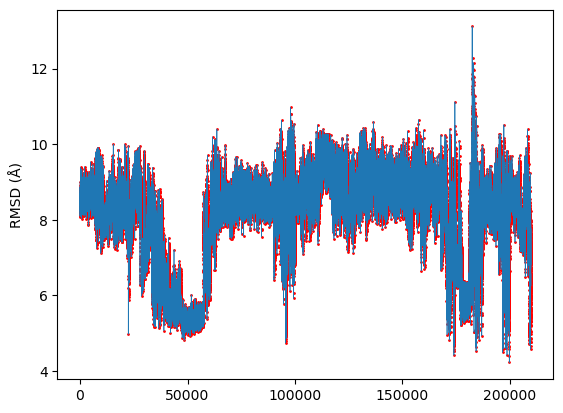

In [13]:
# 可以选择将结果绘制为图表
import matplotlib.pyplot as plt
p_ = 0
print(np.min(rmsd_dict[p_]))
# rmsd_min_list = [np.min(rmsd_dict[k_]) for k_ in rmsd_dict]
plt.plot(rmsd_dict[p_], label=f'aux{p_}', linewidth=0.5)
plt.scatter(range(len(rmsd_dict[p_])), rmsd_dict[p_], 
            color='red', s=1)
# plt.xlabel("time (ps)")
plt.ylabel("RMSD (Å)")

In [ ]:
# 可以选择将结果绘制为图表
import matplotlib.pyplot as plt
rmsd_min_list = [np.min(rmsd_dict[k_]) for k_ in rmsd_dict]
plt.plot(rmsd_min_list)
plt.scatter(range(len(rmsd_min_list)), rmsd_min_list, color='red',
            s=10)
plt.xlabel("time (ps)")
plt.ylabel("RMSD (Å)")

In [ ]:
### deshaw long trajectory conponents


for k_ in range(0, 1024, 8):
    print(f'Processing {k_} ...')
    # if k_ in rmsd_dict:
    #     continue
    ref = mda.Universe(f'/home/zychen/Desktop/interpolation_1opj_2f4j/pdb/aux_{k_}.pdb')
    ref_protein = ref.select_atoms('protein and backbone and resid 145-170')

    traj_path_list_1.sort()
    rmsd_list = []
    for traj_path_ in tqdm(traj_path_list_1):
        u = mda.Universe(template_path_1, traj_path_)
        prot_traj = u.select_atoms('protein and backbone and resid 380-405')
        R = rms.RMSD(prot_traj, ref_protein, select='backbone')
        R.run()
        # 打印结果
        import numpy as np
        # time = u.trajectory.times
        rmsd = R.rmsd.T  # transpose makes it easier for plotting
        # print("时间（ps）: ", time)
        # print("RMSD（Å）: ", rmsd[2])
        rmsd_list.extend(rmsd[2])

    traj_path_list_2.sort()
    for traj_path_ in tqdm(traj_path_list_2):
        u = mda.Universe(template_path_2, traj_path_)
        prot_traj = u.select_atoms('protein and backbone and resid 380-405')
        R = rms.RMSD(prot_traj, ref_protein, select='backbone')
        R.run()
        # 打印结果
        import numpy as np
        # time = u.trajectory.times
        rmsd = R.rmsd.T  # transpose makes it easier for plotting
        # print("时间（ps）: ", time)
        # print("RMSD（Å）: ", rmsd[2])
        rmsd_list.extend(rmsd[2])

    rmsd_dict[k_] = rmsd_list

Processing 0 ...


  0%|          | 0/100 [00:00<?, ?it/s]

/home/zychen/anaconda3/lib/python3.9/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/zychen/anaconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Processing 8 ...


100%|██████████| 100/100 [00:57<00:00,  1.73it/s]


Processing 16 ...


100%|██████████| 100/100 [00:57<00:00,  1.74it/s]


Processing 24 ...


100%|██████████| 100/100 [00:57<00:00,  1.74it/s]


Processing 32 ...


100%|██████████| 100/100 [00:57<00:00,  1.74it/s]


Processing 40 ...


100%|██████████| 100/100 [00:57<00:00,  1.74it/s]


Processing 48 ...


100%|██████████| 100/100 [00:57<00:00,  1.74it/s]


Processing 56 ...


100%|██████████| 100/100 [00:57<00:00,  1.74it/s]


Processing 64 ...


100%|██████████| 100/100 [00:57<00:00,  1.75it/s]


Processing 72 ...


 30%|███       | 30/100 [00:03<00:09,  7.54it/s]


KeyboardInterrupt: 

Text(0, 0.5, 'RMSD (Å)')

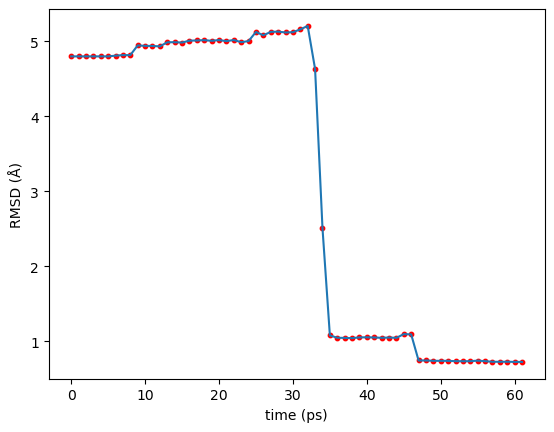

In [171]:
# 可以选择将结果绘制为图表
import matplotlib.pyplot as plt
rmsd_min_list = [np.min(rmsd_dict[k_]) for k_ in rmsd_dict]
plt.plot(rmsd_min_list)
plt.scatter(range(len(rmsd_min_list)), rmsd_min_list, color='red',
            s=10)
plt.xlabel("time (ps)")
plt.ylabel("RMSD (Å)")

#### MurD angle analysis

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# new_lines = []
# for i_ in range(128):
#     f_path = f'/home/zychen/Desktop/interpolation_MurD_128/interpolation/pdb/aux_{i_}.pdb'
#     with open(f_path, 'r') as f:
#         lines = f.read().splitlines()
#     for l_ in lines:
#         if l_.startswith('ATOM'):
#             new_lines.append(l_)
#     new_lines.append('END')

# with open(f'/home/zychen/Desktop/interpolation_MurD_128/interpolation_aux_all.pdb', 'w') as f:
#     for l_ in new_lines:
#         f.write(l_ + '\n')

In [29]:
with open(f'/home/zychen/Desktop/interpolation_MurD_128/interpolate_angle_128.dat', 'r+') as f:
    angle_data_ip = f.read().splitlines()
angle_data_ip = np.asarray([float(i) for i in angle_data_ip])
with open(f'/home/zychen/Desktop/interpolation_MurD_128/MD_angle_100.dat', 'r+') as f:
    angle_data_md = f.read().splitlines()
angle_data_md = np.asarray([float(i) for i in angle_data_md])
print(angle_data_ip.shape, angle_data_md.shape)

(128,) (100,)


In [30]:
open_angle = 89.77
close_angle = 68.81
inter_angle = 82.31

In [29]:
ip_close_delta = angle_data_ip - close_angle
ip_open_delta = angle_data_ip - open_angle
ip_inter_delta = angle_data_ip - inter_angle
md_close_delta = angle_data_md - close_angle
md_open_delta = angle_data_md - open_angle
md_inter_delta = angle_data_md - inter_angle

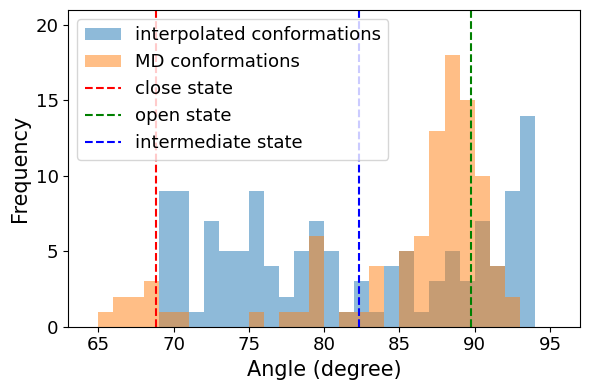

In [ ]:
# plot violin plot for ip v.s. md
# plt.figure(figsize=(6, 4))
# plt.violinplot([ip_close_delta, md_close_delta], positions=[1, 2], widths=0.5)
# plt.violinplot([ip_inter_delta, md_inter_delta], positions=[4, 5], widths=0.5)
# plt.violinplot([ip_open_delta, md_open_delta], positions=[7, 8], widths=0.5)
# # plt.xticks([1, 2, 4, 5, 7, 8], ['IP', 'MD', 'IP', 'MD', 'IP', 'MD'])
# plt.xticks([1.5, 4.5, 7.5], ['close state', 'intermediate state', 'open state'])
# plt.ylabel('Delta Angle based on the Reference Angle')
# # plt.title('MurD Angle Delta Distribution')
# plt.tight_layout()
# # plt.savefig('./MurD_angle_delta_violin.png', dpi=1200)
# plt.show()

plt.figure(figsize=(6, 4))
plt.hist(angle_data_ip, bins=np.arange(65, 95, 1.0), label='interpolated conformations', alpha = 0.5)
plt.hist(angle_data_md, bins=np.arange(65, 95, 1.0), label='MD conformations', alpha = 0.5)
# label close, open, intermediate angle
plt.axvline(x=close_angle, color='red', linestyle='--', label='close state')
plt.axvline(x=open_angle, color='green', linestyle='--', label='open state')
plt.axvline(x=inter_angle, color='blue', linestyle='--', label='intermediate state')

plt.xlim(63, 97)
plt.xticks(np.arange(65, 100, 5), fontsize=13)
plt.ylim(0, 21)
plt.yticks(np.arange(0, 21, 5), fontsize=13)
plt.xlabel('Angle (degree)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend(fontsize=13)
plt.tight_layout()
# plt.savefig('./MurD_angle_distribution.png', dpi=1200)
plt.show()

In [33]:
len(angle_data_ip), len(angle_data_md)

(128, 100)

In [40]:
# KL divergence of the angle distribution
bins = np.arange(60,100,1)  # 101个区间：0-1, 1-2, ..., 99-100

# 对 a 和 b 计算直方图
hist_a, _ = np.histogram(angle_data_ip, bins=bins, density=True)
hist_b, _ = np.histogram(angle_data_md, bins=bins, density=True)

# 为避免除以0，我们将任何概率为0的项用一个很小的值替代（平滑）
epsilon = 1e-10
hist_a = np.maximum(hist_a, epsilon)
hist_b = np.maximum(hist_b, epsilon)

# 计算KL散度：D_KL(P || Q)
kl_divergence = np.sum(hist_a * np.log(hist_a / hist_b))

print(f"KL Divergence (P || Q): {kl_divergence}")

KL Divergence (P || Q): 7.410125020427561


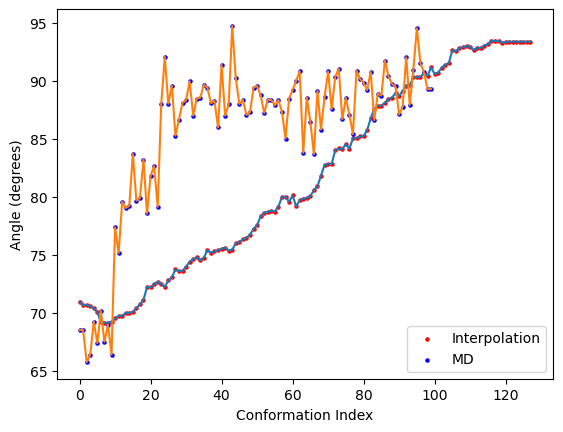

In [26]:
plt.plot(angle_data_ip)
plt.scatter(range(0, 128, 1), angle_data_ip, color='red', s=5, label='Interpolation')
plt.plot(angle_data_md)
plt.scatter(range(0, 100, 1), angle_data_md, color='blue', s=5, label='MD')
plt.ylabel('Angle (degrees)')
plt.xlabel('Conformation Index')
plt.legend()

#### GPCR_CCL_analysis

In [11]:
import matplotlib.pyplot as plt
import numpy as np

opioid_aux_0_loose-A118H1_A212H1__mW_x ,opioid_aux_0_loose-A118H1_A212H1__mW_y ,opioid_aux_127_loose-A118H1_A212H1__mW_x ,opioid_aux_127_loose-A118H1_A212H1__mW_y ,opioid_aux_50_loose-A118H1_A212H1__mW_x ,opioid_aux_50_loose-A118H1_A212H1__mW_y ,
35.370603015075375 42.7 39.294207317073166


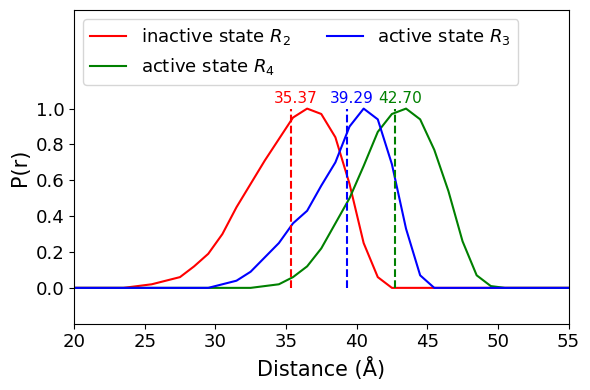

In [57]:
with open(f'./mtsslWizard.txt', 'r+') as f:
    mtsslWizard_data = f.read().splitlines()
header = mtsslWizard_data.pop(0)
print(header)
aux_0_x = []
aux_0_y = []
aux_127_x = []
aux_127_y = []
aux_50_x = []
aux_50_y = []

for l_ in mtsslWizard_data:
    l_ = l_.strip().split(',')
    aux_0_x.append(float(l_[0]))
    aux_0_y.append(float(l_[1]))
    aux_127_x.append(float(l_[2]))
    aux_127_y.append(float(l_[3]))
    aux_50_x.append(float(l_[4]))
    aux_50_y.append(float(l_[5]))

average_aux_0 = np.dot(aux_0_x, aux_0_y) / np.sum(aux_0_y)
average_aux_127 = np.dot(aux_127_x, aux_127_y) / np.sum(aux_127_y)
average_aux_50 = np.dot(aux_50_x, aux_50_y) / np.sum(aux_50_y)
print(average_aux_0, average_aux_127, average_aux_50)

plt.figure(figsize=(6, 4))

plt.plot(aux_0_x, aux_0_y, label='inactive state $R_2$', color='red')
plt.plot(aux_127_x, aux_127_y, label='active state $R_4$', color='green')
plt.plot(aux_50_x, aux_50_y, label='active state $R_3$', color='blue')


alpha=-1.2
beta=0.03
plt.plot([average_aux_0, average_aux_0], [0, np.max(aux_0_y)], color='red', linestyle='--')
plt.text(average_aux_0+alpha, np.max(aux_0_y)+beta, f'{average_aux_0:.2f}', fontsize=11, color='red')
plt.plot([average_aux_127, average_aux_127], [0, np.max(aux_127_y)], color='green', linestyle='--')
plt.text(average_aux_127+alpha, np.max(aux_127_y)+beta, f'{average_aux_127:.2f}', fontsize=11, color='green')
plt.plot([average_aux_50, average_aux_50], [0, np.max(aux_50_y)], color='blue', linestyle='--')
plt.text(average_aux_50+alpha, np.max(aux_50_y)+beta, f'{average_aux_50:.2f}', fontsize=11, color='blue')



# plt.axvline(x=average_aux_0, color='red', linestyle='--', label='Inactive state mean')
# plt.axvline(x=average_aux_127, color='green', linestyle='--', label='Intermediate state mean')
# plt.axvline(x=average_aux_50, color='blue', linestyle='--', label='Active state mean')
# plt.axvline(x=np.mean(aux_0_y), color='red', linestyle='--', label='Inactive state mean')
# plt.axvline(x=np.mean(aux_127_y), color='green', linestyle='--', label='Intermediate state mean')
# plt.axvline(x=np.mean(aux_50_y), color='blue', linestyle='--', label='Active state mean')

plt.xlim(20, 55)
plt.ylim(-0.2, 1.55)
plt.xticks(np.arange(20, 60, 5), fontsize=13)
plt.yticks(np.arange(0, 1.2, 0.2), fontsize=13)

plt.xlabel('Distance (Å)', fontsize=15)
plt.ylabel('P(r)', fontsize=15)
plt.legend(fontsize=13, ncol=2, loc='upper left')
plt.tight_layout()
plt.savefig('./GPCR_ccl_mtsslWizard.png', dpi=1200)
plt.show()

#### deshaw RMSD analysis

In [109]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pickle as pkl
import os

In [114]:
rmsd_dict = {}
for f_ in tqdm(range(1024)):
    path_ = f'/media/zychen/czycsd/DE_SHAW_traj_for_pocket/rmsd_for_deshaw_traj/aux_{f_}_rmsd.pkl'
    with open(path_, 'rb') as f:
        rmsd_list = pkl.load(f)
    rmsd_dict[f_] = rmsd_list

100%|██████████| 1024/1024 [00:53<00:00, 19.26it/s]


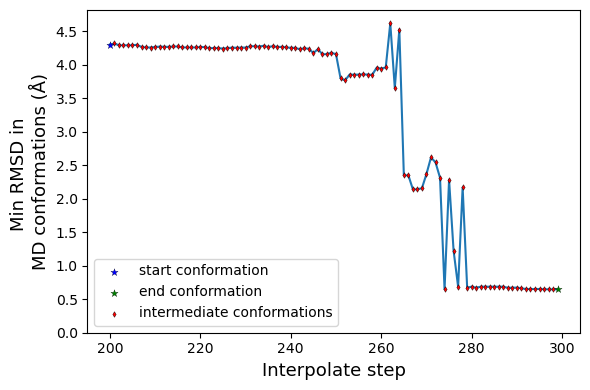

In [ ]:
# rmsd_min_list = [np.min(rmsd_dict[k_]) for k_ in rmsd_dict]
plt.figure(figsize=(6, 4))
plt.plot(rmsd_min_list[200:300], linewidth=1.5)

plt.scatter([0,], [rmsd_min_list[200],], color='blue',
            s=30, marker='*', label='start conformation',
            edgecolors='black', linewidths=0.2, zorder=25)
plt.scatter([99,], [rmsd_min_list[299],], color='green',
            s=30, marker='*', label='end conformation', 
            edgecolors='black', linewidths=0.2, zorder=25)
plt.scatter(range(1, 1+len(rmsd_min_list[201:299])), rmsd_min_list[201:299], color='red',
            s=8, marker='d', label='intermediate conformations', 
            edgecolors='black', linewidths=0.3, zorder=20)

plt.xlabel("Interpolate step", fontsize=13)
plt.ylabel("Min RMSD in \nMD conformations (Å)", fontsize=13)
plt.xticks(np.arange(0, 110, 20), np.arange(200, 310, 20), fontsize=10)
plt.yticks(np.arange(0, 5, 0.5), fontsize=10)
plt.legend(fontsize=10)

plt.tight_layout()
plt.savefig('./deshaw_200_300_rmsd_min.png', dpi=1200)
plt.show()

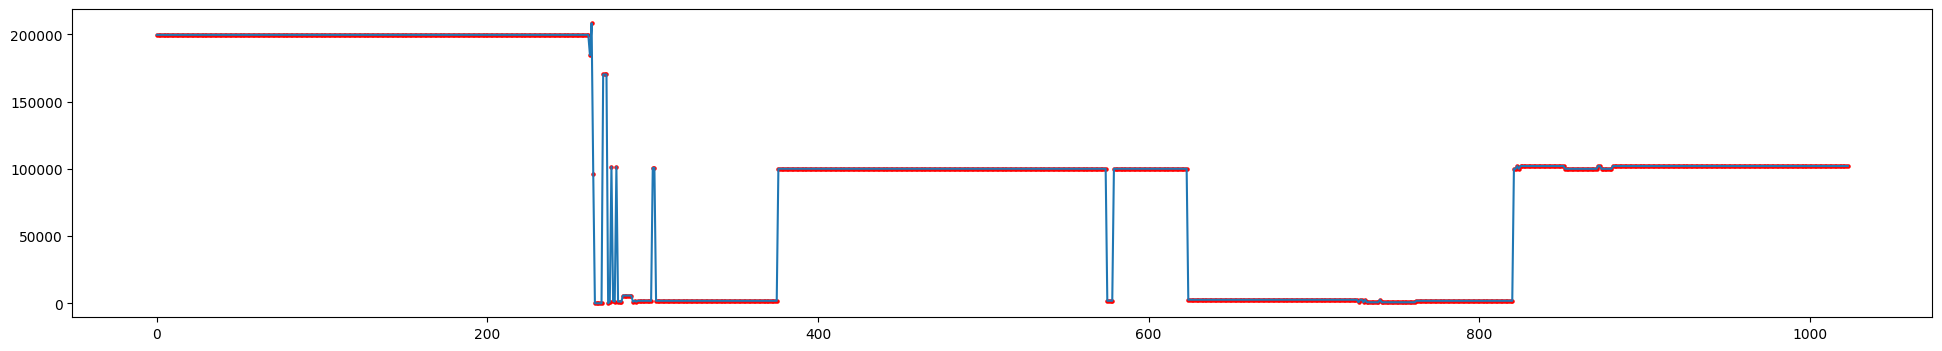

In [30]:
# argmin_list = []
# for k_ in rmsd_dict:
#     argmin_list.append(np.argmin(rmsd_dict[k_]))
#     # print(k_, np.argmin(rmsd_dict[k_]))
plt.figure(figsize=(24, 4))
plt.plot(argmin_list[::1])
plt.scatter(range(len(argmin_list[::1])), argmin_list[::1], color='red',
            s=5)

#### NEW TICA

In [1]:
import os
import numpy as np
import pickle as pkl
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import cm

import MDAnalysis as mda
import pyemma
from MDAnalysis.analysis.dihedrals import Dihedral
from MDAnalysis.analysis import rms, align

import warnings
warnings.filterwarnings("ignore")

In [ ]:
### 2f4j v.s. 3k5v rmsd, aligned by Active loop
ref_protein_path_ = f'./2f4j.pdb'
ref = mda.Universe(ref_protein_path_)
ref_protein = ref.select_atoms('protein and backbone and resid 384-404')

template_path_ = f'./3k5v_fixed.pdb'
u = mda.Universe(template_path_)
prot_traj = u.select_atoms('protein and backbone and resid 403-423')
R = rms.RMSD(prot_traj, ref_protein, select='backbone')
R.run()
rmsd = R.rmsd.T  # transpose makes it easier for plotting
print('2f4j v.s. 3k5v rmsd:', rmsd[2][0])

2f4j v.s. 3k5v rmsd: 8.06902468278173


In [ ]:
### 2f4j v.s. 3k5v rmsd, aligned by Global frame
ref_protein_path_ = f'./2f4j.pdb'
ref = mda.Universe(ref_protein_path_)
ref_protein = ref.select_atoms('protein and backbone and resid 237-498')
coords_of_ref_protein = ref_protein.positions
print(np.asarray(coords_of_ref_protein).sum(-1).sum(-1))

template_path_ = f'./3k5v_fixed.pdb'
u = mda.Universe(template_path_)
temp_protein = u.select_atoms('protein and backbone and resid 256-517')
coords_of_temp_protein = temp_protein.positions
print(np.asarray(coords_of_temp_protein).sum(-1).sum(-1))

# aligner = align.AlignTraj(u, ref_protein, select='protein and backbone and resid 256-517').run()
rmsds = align.alignto(temp_protein,  # mobile
                      ref_protein,  # reference
                      select='protein and backbone', # selection to operate on
                      match_atoms=True) # whether to match atoms 
print(rmsds) # Global RMSD
coords_of_ref_protein = ref_protein.positions
print(np.asarray(coords_of_ref_protein).sum(-1).sum(-1))

coords_of_temp_protein = temp_protein.positions
print(np.asarray(coords_of_temp_protein).sum(-1).sum(-1))

ref_protein_al = ref_protein.universe.select_atoms('protein and backbone and resid 384-404')
temp_protein_al = temp_protein.universe.select_atoms('protein and backbone and resid 403-423')
ref_protein_al_coords = ref_protein_al.positions
temp_protein_al_coords = temp_protein_al.positions
ref_protein_al_mass_center = np.mean(ref_protein_al_coords, axis=0)
temp_protein_al_mass_center = np.mean(temp_protein_al_coords, axis=0)
mass_center_diff = ref_protein_al_mass_center - temp_protein_al_mass_center
mass_center_dist = np.sqrt(np.sum(mass_center_diff**2))
print(mass_center_dist)
error = np.sqrt(np.sum((ref_protein_al_coords - temp_protein_al_coords)**2))
print(error)


-21438.46
99237.05
(17.499939621420886, 5.081485865796436)
-21438.46
-21438.459
11.790573
153.24408


In [4]:

traj_path_list_1 = []
template_path_1 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-imatinib-binding-G0-5559010-main1-no-water/template.pdb'
traj_dir_1 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-imatinib-binding-G0-5559010-main1-no-water/natcomm2023-imatinib-binding-G0-5559010-main1-no-water'
for file in os.listdir(traj_dir_1):
    if file.endswith('.dcd'):
        traj_path_list_1.append(os.path.join(traj_dir_1, file))

traj_path_list_2 = []
template_path_2 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-imatinib-binding-G0-5558993-main2-no-water/template.pdb'
traj_dir_2 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-imatinib-binding-G0-5558993-main2-no-water/natcomm2023-imatinib-binding-G0-5558993-main2-no-water'
for file in os.listdir(traj_dir_2):
    if file.endswith('.dcd'):
        traj_path_list_2.append(os.path.join(traj_dir_2, file))

traj_path_list_3 = []
template_path_3 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G1-no-water/template.pdb'
traj_dir_3 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G1-no-water/natcomm2023-short-imatinib-G1-no-water'
for file in os.listdir(traj_dir_3):
    if file.endswith('.dcd'):
        traj_path_list_3.append(os.path.join(traj_dir_3, file))

traj_path_list_4 = []
template_path_4 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G2-no-water/template.pdb'
traj_dir_4 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G2-no-water/natcomm2023-short-imatinib-G2-no-water'
for file in os.listdir(traj_dir_4):
    if file.endswith('.dcd'):
        traj_path_list_4.append(os.path.join(traj_dir_4, file))

traj_path_list_5 = []
template_path_5 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G3-no-water/template.pdb'
traj_dir_5 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G3-no-water/natcomm2023-short-imatinib-G3-no-water'
for file in os.listdir(traj_dir_5):
    if file.endswith('.dcd'):
        traj_path_list_5.append(os.path.join(traj_dir_5, file))

traj_path_list_6 = []
template_path_6 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G4-no-water/template.pdb'
traj_dir_6 = '/media/zychen/czycsd/DE_SHAW_traj_for_pocket/drug_binding_process_big_change/DESRES-Trajectory_natcomm2023-short-imatinib-G4-no-water/natcomm2023-short-imatinib-G4-no-water'
for file in os.listdir(traj_dir_6):
    if file.endswith('.dcd'):
        traj_path_list_6.append(os.path.join(traj_dir_6, file))

In [39]:
# ### conponents of deshaw G0-1 & G1-G4 
# # AL indexes:
# # interpolation: resid 149-169
# # MD: resid 384-404
# # 2f4j: resid 384-404
# # 3k5v: resid 403-423
# # 1opj: resid 403-423

# # GL indexes:
# # interpolation: resid  2-263
# # MD: resid 237-498
# # 2f4j: resid 237-498
# # 3k5v: resid 256-517
# # 1opj: resid 256-517



# conponents_list = []
# for template_path_, traj_path_list_ in zip([template_path_1, template_path_3, template_path_4, template_path_5, template_path_6],
#                                              [traj_path_list_1, traj_path_list_3, traj_path_list_4, traj_path_list_5, traj_path_list_6]):
#     # global align and get the mass center coords
#     ref = mda.Universe(f'./2f4j.pdb')
#     ref_protein = ref.select_atoms('protein and backbone and resid 237-498')
#     # ref_protein_universe = ref_protein.universe
#     act_loop_coords_list = []
#     dihedral_sin_cos_list = []
#     for traj_path_ in tqdm(traj_path_list_):
        
#         coords_list = []
#         u = mda.Universe(template_path_, traj_path_)
        
#         act_loop = u.select_atoms('protein and backbone and resid 384-404')
#         phi_ags = [res.phi_selection() for res in act_loop.residues]
#         phi = Dihedral(phi_ags).run()
#         phi_angles = phi.angles
#         psi_ags = [res.psi_selection() for res in act_loop.residues]
#         psi = Dihedral(psi_ags).run()
#         psi_angles = psi.angles
#         phi_psi_angles = np.concatenate([phi_angles, psi_angles], axis=1)
#         phi_psi_sin = np.sin(phi_psi_angles * np.pi / 180)
#         phi_psi_cos = np.cos(phi_psi_angles * np.pi / 180)
#         dihedral_sin_cos_ = np.concatenate([phi_psi_sin, phi_psi_cos], axis=1)
            
#         # align the trajectory to the reference use mda
#         aligner = align.AlignTraj(u, ref_protein, select='protein and backbone and resid 237-498',
#                                   in_memory=False).run()
#         for ts in u.trajectory:
#             select_AL_atoms_aligned = u.select_atoms('protein and backbone and resid 384-404')
#             select_atom_coords_aligned = select_AL_atoms_aligned.positions
#             coords_list.append(np.asarray(select_atom_coords_aligned)[None,...])
#         coords_array = np.concatenate(coords_list, axis=0)
        
#         dihedral_sin_cos_list.append(dihedral_sin_cos_)
#         act_loop_coords_list.append(coords_array)
        
#         # print(dihedral_sin_cos_.shape) # (n_frames, 21*2*2) sin_cos for phi and psi
#         # print(coords_array.shape) # (n_frames, 21*4, 3) 3_coords for N, CA, C, O
    
#     dihedral_sin_cos_array = np.concatenate(dihedral_sin_cos_list, axis=0) # (n_frames, 84)
#     act_loop_coords_array = np.concatenate(act_loop_coords_list, axis=0) # (n_frames, 84, 3)
#     act_loop_mass_center_array = np.mean(act_loop_coords_array, axis=1) # (n_frames, 3)
    
#     conponents_ = np.concatenate([dihedral_sin_cos_array, act_loop_mass_center_array], axis=1) # (n_frames, 87)
#     print(conponents_.shape)
#     conponents_list.append(conponents_)

# conponents_array = np.concatenate(conponents_list, axis=0) # (n_frames_all, 87)
# print(conponents_array.shape)

# with open(f'./deshaw_md_conponents_241219.pkl', 'wb') as f:
#     pkl.dump(conponents_array, f)

with open(f'./deshaw_md_conponents_241219.pkl', 'rb') as f:
    conponents_array_md = pkl.load(f)
conponents_array_md.shape

(109752, 87)

In [21]:
# # conponents of 1opj and 2f4j
# # AL indexes:
# # interpolation: resid 149-169
# # MD: resid 384-404
# # 2f4j: resid 384-404
# # 3k5v: resid 403-423
# # 1opj: resid 403-423

# # GL indexes:
# # interpolation: resid  2-263
# # MD: resid 237-498
# # 2f4j: resid 237-498
# # 3k5v: resid 256-517
# # 1opj: resid 256-517

ref_protein_path_ = f'./2f4j.pdb'
ref = mda.Universe(ref_protein_path_)
ref_protein = ref.select_atoms('protein and backbone and resid 237-498')

act_loop_ref = ref.select_atoms('protein and backbone and resid 384-404')
phi_ags = [res.phi_selection() for res in act_loop_ref.residues]
phi = Dihedral(phi_ags).run()
phi_angles = phi.angles
psi_ags = [res.psi_selection() for res in act_loop_ref.residues]
psi = Dihedral(psi_ags).run()
psi_angles = psi.angles
phi_psi_angles = np.concatenate([phi_angles, psi_angles], axis=1)
phi_psi_sin = np.sin(phi_psi_angles * np.pi / 180)
phi_psi_cos = np.cos(phi_psi_angles * np.pi / 180)
dihedral_sin_cos_ = np.concatenate([phi_psi_sin, phi_psi_cos], axis=1)

act_loop_ref_coords = act_loop_ref.positions
act_loop_ref_mass_center = np.mean(act_loop_ref_coords, axis=0)[None,...]
conponents_2f4j = np.concatenate([dihedral_sin_cos_, act_loop_ref_mass_center], axis=1)
print(conponents_2f4j.shape)



temp_path_ = f'./1opj.pdb'
u = mda.Universe(temp_path_)
temp_protein = u.select_atoms('protein and backbone and resid 256-517')

act_loop_temp = u.select_atoms('protein and backbone and resid 403-423')
phi_ags = [res.phi_selection() for res in act_loop_temp.residues]
phi = Dihedral(phi_ags).run()
phi_angles = phi.angles
psi_ags = [res.psi_selection() for res in act_loop_temp.residues]
psi = Dihedral(psi_ags).run()
psi_angles = psi.angles
phi_psi_angles = np.concatenate([phi_angles, psi_angles], axis=1)
phi_psi_sin = np.sin(phi_psi_angles * np.pi / 180)
phi_psi_cos = np.cos(phi_psi_angles * np.pi / 180)
dihedral_sin_cos_ = np.concatenate([phi_psi_sin, phi_psi_cos], axis=1)

rmsds = align.alignto(temp_protein,  # mobile
                      ref_protein,  # reference
                      select='protein and backbone', # selection to operate on
                      match_atoms=True) # whether to match atoms 
print(rmsds) # Global RMSD
act_loop_temp_after_align = temp_protein.select_atoms('protein and backbone and resid 403-423')
act_loop_temp_coords = act_loop_temp_after_align.positions
act_loop_temp_mass_center = np.mean(act_loop_temp_coords, axis=0)[None,...]
conponents_1opj = np.concatenate([dihedral_sin_cos_, act_loop_temp_mass_center], axis=1)
print(conponents_1opj.shape)


(1, 87)
(17.691139043353168, 5.098751117155719)
(1, 87)


In [22]:
# conponents of interpolation from 1opj to 2f4j
# # AL indexes:
# # interpolation: resid 149-169
# # MD: resid 384-404
# # 2f4j: resid 384-404
# # 3k5v: resid 403-423
# # 1opj: resid 403-423

# # GL indexes:
# # interpolation: resid  2-263
# # MD: resid 237-498
# # 2f4j: resid 237-498
# # 3k5v: resid 256-517
# # 1opj: resid 256-517

interpolate_pdb_path = []
for i in range(1024):
    interpolate_pdb_path.append(f'/home/zychen/Desktop/interpolation_1opj_2f4j/pdb/aux_{i}.pdb')

phi_list = []
psi_list = []
mass_center_list = []

for p_ in tqdm(interpolate_pdb_path):
    
    u_ = mda.Universe(p_)
    
    active_loop_select = u_.select_atoms('protein and backbone and resid 149-169')
    phi_ags = [res.phi_selection() for res in active_loop_select.residues]
    phi = Dihedral(phi_ags).run()
    phi_angles = phi.angles[0]
    psi_ags = [res.psi_selection() for res in active_loop_select.residues]
    psi = Dihedral(psi_ags).run()
    psi_angles = psi.angles[0]
    phi_list.append(phi_angles)
    psi_list.append(psi_angles)
    
    ref = mda.Universe(f'./2f4j.pdb')
    ref_protein = ref.select_atoms('protein and backbone and resid 237-498')
    u_select = u_.select_atoms('protein and backbone and resid 2-263')
    rmsds = align.alignto(u_select,  # mobile
                          ref_protein,  # reference
                          select='protein and backbone', # selection to operate on
                          match_atoms=True) # whether to match atoms
    active_loop_select = u_select.select_atoms('protein and backbone and resid 149-169')
    mass_center = np.mean(u_select.positions, axis=0)
    mass_center_list.append(mass_center)
    
phi_array = np.array(phi_list)
psi_array = np.array(psi_list)
mass_center_list = np.array(mass_center_list)
print(phi_array.shape, psi_array.shape, mass_center_list.shape)
conponents_interpolate_1opj_2f4j = np.concatenate([phi_array, psi_array], axis=1)
conponents_interpolate_sin_1opj_2f4j = np.sin(conponents_interpolate_1opj_2f4j * np.pi / 180)
conponents_interpolate_cos_1opj_2f4j = np.cos(conponents_interpolate_1opj_2f4j * np.pi / 180)
conponents_interpolate_1opj_2f4j = np.concatenate([conponents_interpolate_sin_1opj_2f4j, 
                                                  conponents_interpolate_cos_1opj_2f4j, mass_center_list], axis=1)
print(conponents_interpolate_1opj_2f4j.shape)

100%|██████████| 1024/1024 [00:37<00:00, 27.25it/s]

(1024, 21) (1024, 21) (1024, 3)
(1024, 87)


In [24]:
# tica
tica_fitted = pyemma.coordinates.tica(conponents_array_md, lag=100, dim=2)
ic12_deshaw_md = tica_fitted.get_output()[0]
ic12_1opj = tica_fitted.transform(conponents_1opj)
ic12_2f4j = tica_fitted.transform(conponents_2f4j)
ic12_interpolate_1opj_2f4j = tica_fitted.transform(conponents_interpolate_1opj_2f4j)

(20,)
(2, 11)
(11, 2)


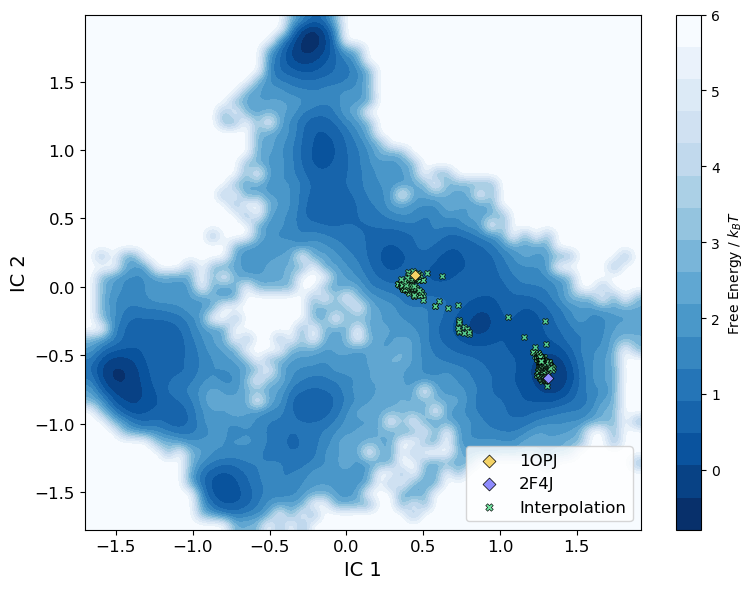

In [106]:
# 创建 2D 直方图
from matplotlib.pyplot import tick_params
# from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import get_cmap

h_, xedge_, yedge_ = np.histogram2d(
    ic12_deshaw_md[:, 0], ic12_deshaw_md[:, 1], 
    bins=50, density=True
)


# 找出最大密度 bin 的索引
num_top_bins = 20  # 选择最密集的前 20 个 bin
top_bins = np.unravel_index(np.argsort(h_, axis=None)[-num_top_bins:], h_.shape)
print(top_bins[0].shape)
bin_overlay = 40
selected_top_bins = [[top_bins[0][0]], [top_bins[1][0]]]
for bin_x, bin_y in zip(top_bins[0], top_bins[1]):
    if (np.abs(bin_x - top_bins[0][0]) + np.abs(bin_y - top_bins[1][0])) <= bin_overlay:
        continue
    else:
        selected_top_bins[0].append(bin_x)
        selected_top_bins[1].append(bin_y)
top_bins = np.asarray(selected_top_bins)
print(top_bins.shape)
# 根据 bin 范围筛选数据点
top_points = []
top_points_index = []
for row, col in zip(top_bins[0], top_bins[1]):
    x_min, x_max = xedge_[row], xedge_[row + 1]
    y_min, y_max = yedge_[col], yedge_[col + 1]
    
    # 筛选数据点 & get the index in the original data
    for i, (x, y) in enumerate(zip(ic12_deshaw_md[:, 0], ic12_deshaw_md[:, 1])):
        if x >= x_min and x < x_max and y >= y_min and y < y_max:
            top_points.append([x, y])
            top_points_index.append(i)
            break
top_points = np.array(top_points)
print(top_points.shape)
#     points_in_bin = ic12_deshaw_md[
#         (ic12_deshaw_md[:, 0] >= x_min) & (ic12_deshaw_md[:, 0] < x_max) &
#         (ic12_deshaw_md[:, 1] >= y_min) & (ic12_deshaw_md[:, 1] < y_max)
#     ]
#     top_points.extend(points_in_bin)
# top_points = np.array(top_points)


# 对数据进行 -log10 处理，避免对数计算时 log(0) 出现问题
hist_nlog10 = -np.log10(h_ + 1e-6)
hist_nlog10 = np.where(h_ == 0, np.max(hist_nlog10), hist_nlog10)

# 绘制等高线图和散点图
plt.figure(figsize=(8, 6))
# plt.xlim(-1.5, 2.5)
# plt.ylim(-2.5, 3.0)
# colors = [(1, 0, 0), (0.95, 1.0, 0.95),]  # 白色到红色
# n_bins = 16  # 使用的颜色数量
# cmap_name = 'white_red'
# cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# 使用 imshow 绘制背景
im = plt.imshow(
    hist_nlog10.T,                    # 转置以匹配直方图的坐标系统
    cmap=get_cmap('Blues_r', 16),  # 使用 'viridis' 优化配色
    # cmap=cm,
    interpolation='bicubic',          # 优化插值
    extent=[xedge_[0], xedge_[-1], yedge_[0], yedge_[-1]],  # 对齐 scatter 的坐标范围
    origin='lower',                   # 确保坐标原点一致
    aspect='auto'                     # 保持等比例
)
cbar = plt.colorbar(im, label=r"Free Energy / $k_{B}T$",)

# plt.scatter(ic12_1opj[:, 0], ic12_1opj[:, 1], color='blue', s=10, label='1opj')
# plt.scatter(ic12_2f4j[:, 0], ic12_2f4j[:, 1], color='green', s=10, label='2f4j')

plt.scatter(
    ic12_1opj[0, 0], ic12_1opj[0, 1],
    color='#F3D266', marker='D',
    s=30, label='1OPJ', edgecolors='black', linewidths=0.5, zorder=20
)

plt.scatter(
    ic12_2f4j[0, 0], ic12_2f4j[0, 1],
    color='#8E8BFE', marker='D', 
    s=30, label='2F4J', edgecolors='black', linewidths=0.5, zorder=20
)

plt.scatter(ic12_interpolate_1opj_2f4j[:, 0], ic12_interpolate_1opj_2f4j[:, 1], 
            color='#63E398', s=20, alpha=0.9, label='Interpolation',
            edgecolors='black', linewidths=0.5, marker='X', zorder=10)

# for kk_ in [0, 5, 6]:
#     plt.text(top_points[kk_, 0], top_points[kk_, 1], f'{top_points_index[kk_]}', fontsize=12)
#     plt.scatter(top_points[kk_, 0], top_points[kk_, 1], color='red', s=10)


# plt.scatter(top_points[:, 0], top_points[:, 1], color='green', s=10, label='DESHAW')


# 设置标题和轴标签
# plt.title("Conformation", fontsize=14)
plt.xlabel("IC 1", fontsize=14)
plt.ylabel("IC 2", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# set legend alpha=0.5 use plt.legend():
plt.legend(fontsize=12, loc='lower right', 
           ncol=1, markerscale=1.2,
           )
 # scatterpoints=1,)

# 显示图像
plt.tight_layout()
plt.savefig('./DESHAW_traj_data_2D_RCSB.png', dpi=1200)
plt.show()

In [56]:
# # conponents of interpolation from 14 to 34325
# # AL indexes:
# # interpolation: resid 149-169
# # MD: resid 384-404
# # 2f4j: resid 384-404
# # 3k5v: resid 403-423
# # 1opj: resid 403-423

# # GL indexes:
# # interpolation: resid  2-263
# # MD: resid 237-498
# # 2f4j: resid 237-498
# # 3k5v: resid 256-517
# # 1opj: resid 256-517

interpolate_pdb_path = []
for i in range(128):
    interpolate_pdb_path.append(f'/home/zychen/Desktop/interpolation_14_34325/interpolation/pdb/aux_{i}.pdb')

phi_list = []
psi_list = []
mass_center_list = []

for p_ in tqdm(interpolate_pdb_path):
    
    u_ = mda.Universe(p_)
    
    active_loop_select = u_.select_atoms('protein and backbone and resid 149-169')
    phi_ags = [res.phi_selection() for res in active_loop_select.residues]
    phi = Dihedral(phi_ags).run()
    phi_angles = phi.angles[0]
    psi_ags = [res.psi_selection() for res in active_loop_select.residues]
    psi = Dihedral(psi_ags).run()
    psi_angles = psi.angles[0]
    phi_list.append(phi_angles)
    psi_list.append(psi_angles)
    
    ref = mda.Universe(f'./2f4j.pdb')
    ref_protein = ref.select_atoms('protein and backbone and resid 237-498')
    u_select = u_.select_atoms('protein and backbone and resid 2-263')
    rmsds = align.alignto(u_select,  # mobile
                          ref_protein,  # reference
                          select='protein and backbone', # selection to operate on
                          match_atoms=True) # whether to match atoms
    active_loop_select = u_select.select_atoms('protein and backbone and resid 149-169')
    mass_center = np.mean(u_select.positions, axis=0)
    mass_center_list.append(mass_center)
    
phi_array = np.array(phi_list)
psi_array = np.array(psi_list)
mass_center_array = np.array(mass_center_list)
print(phi_array.shape, psi_array.shape, mass_center_array.shape)
conponents_interpolate_14_34325 = np.concatenate([phi_array, psi_array], axis=1)
conponents_interpolate_sin_14_34325 = np.sin(conponents_interpolate_14_34325 * np.pi / 180)
conponents_interpolate_cos_14_34325 = np.cos(conponents_interpolate_14_34325 * np.pi / 180)
conponents_interpolate_14_34325 = np.concatenate([conponents_interpolate_sin_14_34325, 
                                                  conponents_interpolate_cos_14_34325, mass_center_array], axis=1)
print(conponents_interpolate_14_34325.shape)

100%|██████████| 128/128 [00:04<00:00, 27.15it/s]

(128, 21) (128, 21) (128, 3)
(128, 87)


In [62]:
# # conponents of interpolation from 14 to 67543
# # AL indexes:
# # interpolation: resid 149-169
# # MD: resid 384-404
# # 2f4j: resid 384-404
# # 3k5v: resid 403-423
# # 1opj: resid 403-423

# # GL indexes:
# # interpolation: resid  2-263
# # MD: resid 237-498
# # 2f4j: resid 237-498
# # 3k5v: resid 256-517
# # 1opj: resid 256-517

interpolate_pdb_path = []
for i in range(128):
    interpolate_pdb_path.append(f'/home/zychen/Desktop/interpolation_14_67543/interpolation/pdb/aux_{i}.pdb')

phi_list = []
psi_list = []
mass_center_list = []

for p_ in tqdm(interpolate_pdb_path):
    
    u_ = mda.Universe(p_)
    
    active_loop_select = u_.select_atoms('protein and backbone and resid 149-169')
    phi_ags = [res.phi_selection() for res in active_loop_select.residues]
    phi = Dihedral(phi_ags).run()
    phi_angles = phi.angles[0]
    psi_ags = [res.psi_selection() for res in active_loop_select.residues]
    psi = Dihedral(psi_ags).run()
    psi_angles = psi.angles[0]
    phi_list.append(phi_angles)
    psi_list.append(psi_angles)
    
    ref = mda.Universe(f'./2f4j.pdb')
    ref_protein = ref.select_atoms('protein and backbone and resid 237-498')
    u_select = u_.select_atoms('protein and backbone and resid 2-263')
    rmsds = align.alignto(u_select,  # mobile
                          ref_protein,  # reference
                          select='protein and backbone', # selection to operate on
                          match_atoms=True) # whether to match atoms
    active_loop_select = u_select.select_atoms('protein and backbone and resid 149-169')
    mass_center = np.mean(u_select.positions, axis=0)
    mass_center_list.append(mass_center)
    
phi_array = np.array(phi_list)
psi_array = np.array(psi_list)
mass_center_array = np.array(mass_center_list)
print(phi_array.shape, psi_array.shape, mass_center_array.shape)
conponents_interpolate_14_67543 = np.concatenate([phi_array, psi_array], axis=1)
conponents_interpolate_sin_14_67543 = np.sin(conponents_interpolate_14_67543 * np.pi / 180)
conponents_interpolate_cos_14_67543 = np.cos(conponents_interpolate_14_67543 * np.pi / 180)
conponents_interpolate_14_67543 = np.concatenate([conponents_interpolate_sin_14_67543, 
                                                  conponents_interpolate_cos_14_67543, mass_center_array], axis=1)
print(conponents_interpolate_14_67543.shape)

100%|██████████| 128/128 [00:05<00:00, 21.88it/s]

(128, 21) (128, 21) (128, 3)
(128, 87)


In [68]:
# # conponents of interpolation from 34325 to 67543
# # AL indexes:
# # interpolation: resid 149-169
# # MD: resid 384-404
# # 2f4j: resid 384-404
# # 3k5v: resid 403-423
# # 1opj: resid 403-423

# # GL indexes:
# # interpolation: resid  2-263
# # MD: resid 237-498
# # 2f4j: resid 237-498
# # 3k5v: resid 256-517
# # 1opj: resid 256-517

interpolate_pdb_path = []
for i in range(128):
    interpolate_pdb_path.append(f'/home/zychen/Desktop/interpolation_34325_67543/interpolation/pdb/aux_{i}.pdb')

phi_list = []
psi_list = []
mass_center_list = []

for p_ in tqdm(interpolate_pdb_path):
    
    u_ = mda.Universe(p_)
    
    active_loop_select = u_.select_atoms('protein and backbone and resid 149-169')
    phi_ags = [res.phi_selection() for res in active_loop_select.residues]
    phi = Dihedral(phi_ags).run()
    phi_angles = phi.angles[0]
    psi_ags = [res.psi_selection() for res in active_loop_select.residues]
    psi = Dihedral(psi_ags).run()
    psi_angles = psi.angles[0]
    phi_list.append(phi_angles)
    psi_list.append(psi_angles)
    
    ref = mda.Universe(f'./2f4j.pdb')
    ref_protein = ref.select_atoms('protein and backbone and resid 237-498')
    u_select = u_.select_atoms('protein and backbone and resid 2-263')
    rmsds = align.alignto(u_select,  # mobile
                          ref_protein,  # reference
                          select='protein and backbone', # selection to operate on
                          match_atoms=True) # whether to match atoms
    active_loop_select = u_select.select_atoms('protein and backbone and resid 149-169')
    mass_center = np.mean(u_select.positions, axis=0)
    mass_center_list.append(mass_center)
    
phi_array = np.array(phi_list)
psi_array = np.array(psi_list)
mass_center_array = np.array(mass_center_list)
print(phi_array.shape, psi_array.shape, mass_center_array.shape)
conponents_interpolate_34325_67543 = np.concatenate([phi_array, psi_array], axis=1)
conponents_interpolate_sin_34325_67543 = np.sin(conponents_interpolate_34325_67543 * np.pi / 180)
conponents_interpolate_cos_34325_67543 = np.cos(conponents_interpolate_34325_67543 * np.pi / 180)
conponents_interpolate_34325_67543 = np.concatenate([conponents_interpolate_sin_34325_67543, 
                                                  conponents_interpolate_cos_34325_67543, mass_center_array], axis=1)
print(conponents_interpolate_34325_67543.shape)

100%|██████████| 128/128 [00:04<00:00, 28.69it/s]

(128, 21) (128, 21) (128, 3)
(128, 87)


In [69]:
ic12_interpolate_14_34325 = tica_fitted.transform(conponents_interpolate_14_34325)
ic12_interpolate_14_67543 = tica_fitted.transform(conponents_interpolate_14_67543)
ic12_interpolate_34325_67543 = tica_fitted.transform(conponents_interpolate_34325_67543)

(20,)
(2, 11)
(11, 2)


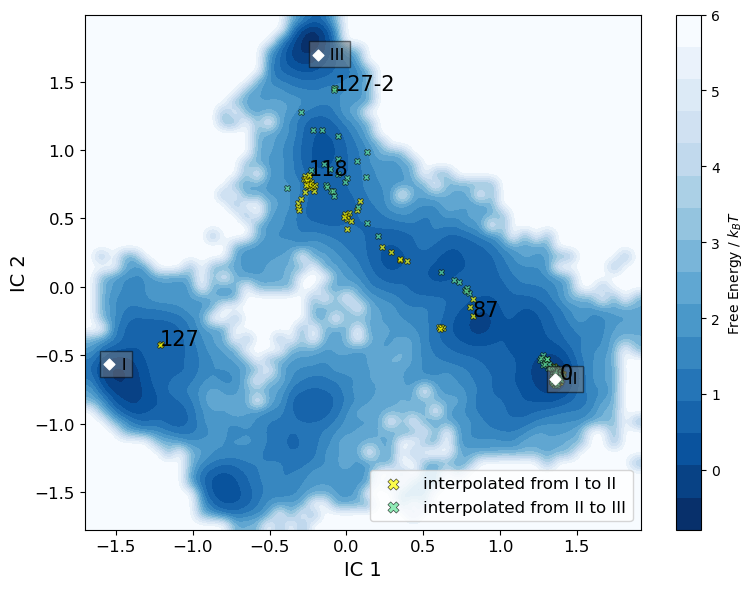

In [267]:
# 创建 2D 直方图
from matplotlib.pyplot import tick_params
# from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import get_cmap

h_, xedge_, yedge_ = np.histogram2d(
    ic12_deshaw_md[:, 0], ic12_deshaw_md[:, 1], 
    bins=50, density=True
)


# 找出最大密度 bin 的索引
num_top_bins = 20  # 选择最密集的前 20 个 bin
top_bins = np.unravel_index(np.argsort(h_, axis=None)[-num_top_bins:], h_.shape)
print(top_bins[0].shape)
bin_overlay = 40
selected_top_bins = [[top_bins[0][0]], [top_bins[1][0]]]
for bin_x, bin_y in zip(top_bins[0], top_bins[1]):
    if (np.abs(bin_x - top_bins[0][0]) + np.abs(bin_y - top_bins[1][0])) <= bin_overlay:
        continue
    else:
        selected_top_bins[0].append(bin_x)
        selected_top_bins[1].append(bin_y)
top_bins = np.asarray(selected_top_bins)
print(top_bins.shape)
# 根据 bin 范围筛选数据点
top_points = []
top_points_index = []
for row, col in zip(top_bins[0], top_bins[1]):
    x_min, x_max = xedge_[row], xedge_[row + 1]
    y_min, y_max = yedge_[col], yedge_[col + 1]
    
    # 筛选数据点 & get the index in the original data
    for i, (x, y) in enumerate(zip(ic12_deshaw_md[:, 0], ic12_deshaw_md[:, 1])):
        if x >= x_min and x < x_max and y >= y_min and y < y_max:
            top_points.append([x, y])
            top_points_index.append(i)
            break
top_points = np.array(top_points)
print(top_points.shape)
#     points_in_bin = ic12_deshaw_md[
#         (ic12_deshaw_md[:, 0] >= x_min) & (ic12_deshaw_md[:, 0] < x_max) &
#         (ic12_deshaw_md[:, 1] >= y_min) & (ic12_deshaw_md[:, 1] < y_max)
#     ]
#     top_points.extend(points_in_bin)
# top_points = np.array(top_points)


# 对数据进行 -log10 处理，避免对数计算时 log(0) 出现问题
hist_nlog10 = -np.log10(h_ + 1e-6)
hist_nlog10 = np.where(h_ == 0, np.max(hist_nlog10), hist_nlog10)

# 绘制等高线图和散点图
plt.figure(figsize=(8, 6))
# plt.xlim(-1.5, 2.5)
# plt.ylim(-2.5, 3.0)
# colors = [(1, 0, 0), (0.95, 1.0, 0.95),]  # 白色到红色
# n_bins = 16  # 使用的颜色数量
# cmap_name = 'white_red'
# cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# 使用 imshow 绘制背景
im = plt.imshow(
    hist_nlog10.T,                    # 转置以匹配直方图的坐标系统
    cmap=get_cmap('Blues_r', 16),  # 使用 'viridis' 优化配色
    # cmap=cm,
    interpolation='bicubic',          # 优化插值
    extent=[xedge_[0], xedge_[-1], yedge_[0], yedge_[-1]],  # 对齐 scatter 的坐标范围
    origin='lower',                   # 确保坐标原点一致
    aspect='auto'                     # 保持等比例
)
cbar = plt.colorbar(im, label=r"Free Energy / $k_{B}T$",)

plt.scatter(ic12_interpolate_14_67543[:, 0], ic12_interpolate_14_67543[:, 1], 
            color='yellow', s=20, alpha=0.7, label='interpolated from I to II',
            edgecolors='black', linewidths=0.5, marker='X')

for idxx in [0, 87, 118, 127]:
# for idxx in range(128):
    plt.text(ic12_interpolate_14_67543[idxx, 0], ic12_interpolate_14_67543[idxx, 1], f'{idxx}', 
             fontsize=15, zorder=100)


plt.scatter(ic12_interpolate_14_34325[:, 0], ic12_interpolate_14_34325[:, 1], 
            color='#63E398', s=20, alpha=0.7, label='interpolated from II to III',
            edgecolors='black', linewidths=0.5, marker='X',)
plt.text(ic12_interpolate_14_34325[127, 0], ic12_interpolate_14_34325[127, 1], f'127-2',
            fontsize=15, zorder=100)

# plt.scatter(ic12_interpolate_34325_67543[:, 0], ic12_interpolate_34325_67543[:, 1], 
#             color='red', s=20, alpha=0.7, label='interpolated from I to III',
#             edgecolors='black', linewidths=0.5, marker='X')

# plt.scatter(ic12_1opj[:, 0], ic12_1opj[:, 1], color='blue', s=10, label='1opj')
# plt.scatter(ic12_2f4j[:, 0], ic12_2f4j[:, 1], color='green', s=10, label='2f4j')

a_ = -0.02
b_ = -0.03
for kk_, text_kk_ in zip([0, 5, 6], ['I', 'II', 'III']):
    plt.text(top_points[kk_, 0]+a_, top_points[kk_, 1]+b_, f'   {text_kk_}', fontsize=12,
             bbox=dict(facecolor='gray', alpha=0.5), zorder=15)
    plt.scatter(top_points[kk_, 0], top_points[kk_, 1], color='white', s=30,
                marker='D', zorder=20)
# I: 67543, II: 14, III: 34325

# plt.scatter(top_points[:, 0], top_points[:, 1], color='green', s=10, label='DESHAW')


# 设置标题和轴标签
# plt.title("Conformation", fontsize=14)
plt.xlabel("IC 1", fontsize=14)
plt.ylabel("IC 2", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='lower right', 
           ncol=1, markerscale=1.8,) # scatterpoints=1,

# 显示图像
plt.tight_layout()
plt.savefig('./DESHAW_traj_data_2D_MD.png', dpi=1200)
plt.show()

In [97]:
top_points_index

[67543, 38420, 39185, 0, 31, 14, 34325, 38443, 39257, 38754, 38477]

#### sequence interpolation analysis

In [3]:
import os
from tqdm import tqdm
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#### SUMO
path_ = '/home/zychen/Desktop/US_sequences/interpolation_0.975_1/pdb'
seq_list = []
for f_ in tqdm(range(128)):
    pdb_path = os.path.join(path_, f'aux_{f_}.pdb')
    seq_list.append(''.join(os.popen(f'pdb_tofasta {pdb_path}').read().splitlines()[1:]))

100%|██████████| 128/128 [00:03<00:00, 39.56it/s]


In [ ]:
print('> init seq') # 1D3Z
print(seq_list[0])
print('> inter seq')
print(seq_list[53])
print('> final seq') # 1U4A
print(seq_list[-1])

> init seq
MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG
> inter seq
MLIKVKTLTGKEIEIDIEPTDTVERIKERVEEKEGIPPQQQRLIYSGKQMNDEKTAAEYKILGESVLHLVLRLRGG
> final seq
INLKVAGQDGSVVQFKIKRHTPLSKLMKAYSERQGLSMRQIRFRFDGQPINETDTPAQLEMEDEDTIDVFQQQTGG


In [45]:
a = 'INLKVAGQDGSVVQFKIKRHTPLSKLMKAYSERQGLSMRQIRFRFDGQPINETDTPAQLEMEDEDTIDVFQQQTGG'
b = 'MLIKVKTLTGKEIEIDIEPTDTVERIKERVEEKEGIPPQQQRLIYSGKQMNDEKTAAEYKILGESVLHLVLRLRGG'

seq_id = np.sum([1 if a == b else 0 for a, b in zip(a, b)]) / len(a)
seq_id

0.19736842105263158

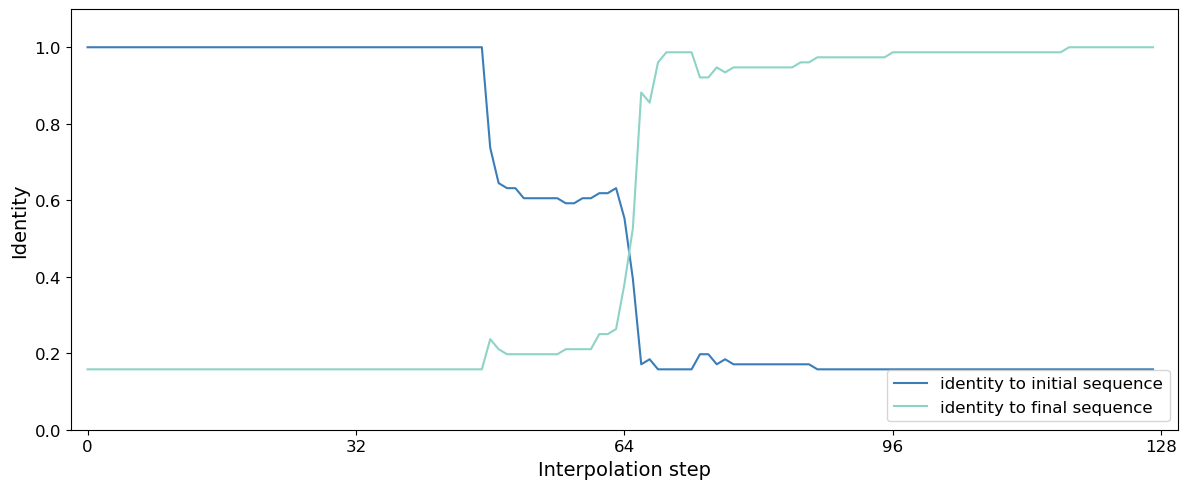

In [27]:
seq_identity_to_seq_1 = []
seq_identity_to_seq_2 = []

for seq_ in seq_list:
    id_1 = [1 if a == b else 0 for a, b in zip(seq_, seq_list[0])]
    id_2 = [1 if a == b else 0 for a, b in zip(seq_, seq_list[127])]
    seq_identity_to_seq_1.append(np.sum(id_1) / len(seq_))
    seq_identity_to_seq_2.append(np.sum(id_2) / len(seq_))

seq_identity_to_seq_1 = np.array(seq_identity_to_seq_1)
seq_identity_to_seq_2 = np.array(seq_identity_to_seq_2)


plt.figure(figsize=(12, 5))
plt.plot(seq_identity_to_seq_1, label='identity to initial sequence',
         color='#3A7DB8', linewidth=1.5)
plt.plot(seq_identity_to_seq_2, label='identity to final sequence',
         color='#8DD3C6', linewidth=1.5)

# plt.plot([0, 0], [0.00, 1.1], color='gray', linestyle='--', linewidth=1.5)
# plt.plot([47, 47], [0.00, 1.1], color='gray', linestyle='--', linewidth=1.5)

# plt.plot([49, 49], [0.00, 1.1], color='gray', linestyle='--', linewidth=1.5)
# plt.plot([63, 63], [0.00, 1.1], color='gray', linestyle='--', linewidth=1.5)

# plt.plot([68, 68], [0.00, 1.1], color='gray', linestyle='--', linewidth=1.5)
# plt.plot([127, 127], [0.00, 1.1], color='gray', linestyle='--', linewidth=1.5)

plt.xlabel('Interpolation step', fontsize=14)
plt.ylabel('Identity', fontsize=14)
plt.xlim(-2, 130)
plt.ylim(-0.0, 1.1)
plt.xticks(np.arange(0, 130, 32), fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=12)
# plt.axvline(x=53, color='gray', linestyle='--', linewidth=1.5)

plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.savefig('./US_sequences_identity.png', dpi=1200)
plt.show()

In [4]:
#### carbon_anhydrase

path_ = '/home/zychen/Desktop/carbonic_anhydrase/interpolation/pdb'
seq_list = []
for f_ in tqdm(range(128)):
    pdb_path = os.path.join(path_, f'aux_{f_}.pdb')
    seq_list.append(''.join(os.popen(f'pdb_tofasta {pdb_path}').read().splitlines()[1:]))

100%|██████████| 128/128 [00:03<00:00, 40.45it/s]


In [5]:
print('> init seq')
print(seq_list[0])
print('> inter seq 1')
print(seq_list[35])
print('> inter seq 2')
print(seq_list[70])
print('> final seq')
print(seq_list[-1])

> init seq
WGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVSYDQATSLRILNNGHSFQVEFDDSQVLKGGPLDGTYRLIQFHFHWGSLDGQGSEHTVDKKKYAAELHLVHWNTKYGDFGKAVQQPDGLAVLGIFLKVGSAKPGLQKVVDVLDSIKTKGKSADFTNFDPRGLLPESLDYWTYPGSLTTPPLLECVTWIVLKEPISVSSEQVLKFRKLNFNGEGEPELMVDNWRPAQPLKNRQIKAS
> inter seq 1
WGYDDKNGPEQWSKLYPIANGNNQSPVDIKTHETKYDTSLKPISVSYNGAAAKEIINVGHSFRVNFEDSDVLKGGPFSGSYRLFQFHFHWGSTNEHGSEHTVDGVKYSAELHVAHWNSKYSSLAEAASKADGLAVIGVLMKVGEANPKLQKVLDALQAIKTKGKEAPFTNFDPKTLLPSSLDFWTYPGSLTHPPLYESVTWIVLKEPISVSSEQLAQFRSLLSNVEGDNVPMQHNNRPTQPLKGREVRAF
> inter seq 2
KWTYGGPDGPDSWRSKYGSACGGLRQSPIDLHSDILKYDASLTPLDFDNLSSDRLRNNGHSVRILLNDKASIHGQGLPSRYRATQLHLHWGNANGPGSEHTVDGQHFAAELHIVHYNSDLYSGDTAAGESDGLAVLAVLIEVGSSNEAFDPIVSALENVPHKEKETFLAPFNLRDLLPARLRYYRYTGSLTTPPCFETVVWTVFRNPVQISQEQLLAFESLLTTGEQSEEIMKNNFRKLQELRSLYTSFS
> final seq
WAYSGAYGPEHWVTSSVSCGGSHQSPIDILDHHARVGDEYQELQLDFDNESSNKMKNTGKTVAILLKDDYFVSGAGLPGRFKAEKVEFHWGHSNGSGSEHSVNGRRFPVEMQIFFYNPDDFDFQTAISENRIIGAMAIFFQVSPRNSALDPIIHGLKGVVHHEKETFLDPFILRDLLPASLSYYRYTGSLTTPPCS

In [42]:
a = 'WGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVSYDQATSLRILNNGHSFQVEFDDSQVLKGGPLDGTYRLIQFHFHWGSLDGQGSEHTVDKKKYAAELHLVHWNTKYGDFGKAVQQPDGLAVLGIFLKVGSAKPGLQKVVDVLDSIKTKGKSADFTNFDPRGLLPESLDYWTYPGSLTTPPLLECVTWIVLKEPISVSSEQVLKFRKLNFNGEGEPELMVDNWRPAQPLKNRQIKAS'
b = 'WAYSGAYGPEHWVTSSVSCGGSHQSPIDILDHHARVGDEYQELQLDFDNESSNKMKNTGKTVAILLKDDYFVSGAGLPGRFKAEKVEFHWGHSNGSGSEHSVNGRRFPVEMQIFFYNPDDFDFQTAISENRIIGAMAIFFQVSPRNSALDPIIHGLKGVVHHEKETFLDPFILRDLLPASLSYYRYTGSLTTPPCSEIVEWIVFRRPVPISYHQLEAFYSIFTTEQKSVEYLRNNFRPQQALNDRVVSKS'

seq_id = np.sum([1 if a == b else 0 for a, b in zip(a, b)]) / len(a)
seq_id

0.312

In [ ]:
# >Initial_sequence
# WGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVSYDQATSLRILNNGHSFQVEFDDSQVLKGGPLDGTYRLIQFHFHWGSLDGQGSEHTVDKKKYAAELHLVHWNTKYGDFGKAVQQPDGLAVLGIFLKVGSAKPGLQKVVDVLDSIKTKGKSADFTNFDPRGLLPESLDYWTYPGSLTTPPLLECVTWIVLKEPISVSSEQVLKFRKLNFNGEGEPELMVDNWRPAQPLKNRQIKAS
# >Interpolated sequence 1
# WGYDDKNGPEQWSKLYPIANGNNQSPVDIKTHETKYDTSLKPISVSYNGAAAKEIINVGHSFRVNFEDSDVLKGGPFSGSYRLFQFHFHWGSTNEHGSEHTVDGVKYSAELHVAHWNSKYSSLAEAASKADGLAVIGVLMKVGEANPKLQKVLDALQAIKTKGKEAPFTNFDPKTLLPSSLDFWTYPGSLTHPPLYESVTWIVLKEPISVSSEQLAQFRSLLSNVEGDNVPMQHNNRPTQPLKGREVRAF
# >Interpolated sequence 2
# KWTYGGPDGPDSWRSKYGSACGGLRQSPIDLHSDILKYDASLTPLDFDNLSSDRLRNNGHSVRILLNDKASIHGQGLPSRYRATQLHLHWGNANGPGSEHTVDGQHFAAELHIVHYNSDLYSGDTAAGESDGLAVLAVLIEVGSSNEAFDPIVSALENVPHKEKETFLAPFNLRDLLPARLRYYRYTGSLTTPPCFETVVWTVFRNPVQISQEQLLAFESLLTTGEQSEEIMKNNFRKLQELRSLYTSFS
# >Final sequence
# WAYSGAYGPEHWVTSSVSCGGSHQSPIDILDHHARVGDEYQELQLDFDNESSNKMKNTGKTVAILLKDDYFVSGAGLPGRFKAEKVEFHWGHSNGSGSEHSVNGRRFPVEMQIFFYNPDDFDFQTAISENRIIGAMAIFFQVSPRNSALDPIIHGLKGVVHHEKETFLDPFILRDLLPASLSYYRYTGSLTTPPCSEIVEWIVFRRPVPISYHQLEAFYSIFTTEQKSVEYLRNNFRPQQALNDRVVSKS

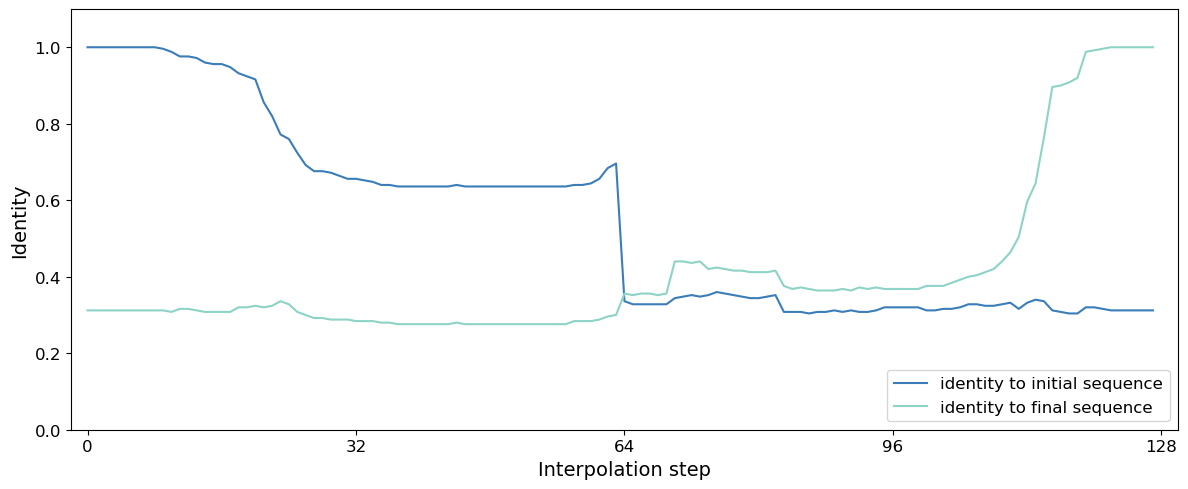

In [15]:
seq_identity_to_seq_1 = []
seq_identity_to_seq_2 = []

for seq_ in seq_list:
    id_1 = [1 if a == b else 0 for a, b in zip(seq_, seq_list[0])]
    id_2 = [1 if a == b else 0 for a, b in zip(seq_, seq_list[127])]
    seq_identity_to_seq_1.append(np.sum(id_1) / len(seq_))
    seq_identity_to_seq_2.append(np.sum(id_2) / len(seq_))

seq_identity_to_seq_1 = np.array(seq_identity_to_seq_1)
seq_identity_to_seq_2 = np.array(seq_identity_to_seq_2)


plt.figure(figsize=(12, 5))
plt.plot(seq_identity_to_seq_1, label='identity to initial sequence',
         color='#3A7DB8', linewidth=1.5)
plt.plot(seq_identity_to_seq_2, label='identity to final sequence',
         color='#8DD3C6', linewidth=1.5)

# plt.plot([0, 0], [0.00, 1.1], color='gray', linestyle='--', linewidth=1.5)
# plt.plot([47, 47], [0.00, 1.1], color='gray', linestyle='--', linewidth=1.5)

# plt.plot([49, 49], [0.00, 1.1], color='gray', linestyle='--', linewidth=1.5)
# plt.plot([63, 63], [0.00, 1.1], color='gray', linestyle='--', linewidth=1.5)

# plt.plot([68, 68], [0.00, 1.1], color='gray', linestyle='--', linewidth=1.5)
# plt.plot([127, 127], [0.00, 1.1], color='gray', linestyle='--', linewidth=1.5)

plt.xlabel('Interpolation step', fontsize=14)
plt.ylabel('Identity', fontsize=14)
plt.xlim(-2, 130)
plt.ylim(-0.0, 1.1)
plt.xticks(np.arange(0, 130, 32), fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=12)

# plt.axvline(x=35, color='gray', linestyle='--', linewidth=1.5)
# plt.axvline(x=70, color='gray', linestyle='--', linewidth=1.5)

plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.savefig('./carbonic_anhydrase_identity.png', dpi=1200)
plt.show()

In [165]:
with open(f'/home/zychen/Desktop/US_sequences/interpolation_0.975_1/sequences_dict.pkl', 'rb') as f:
    seq_dict = pkl.load(f)

In [166]:
seq_dict

{0: 'INLKVAGQDGSVVQFKIKRHTPLSKLMKAYSERQGLSMRQIRFRFDGQPINETDTPAQFELEDEDTIDVFQQQTGG',
 1: 'INLKVAGQDGSVVQFKIKRHTPLSKLMKAYSERQGLSMRQIRFRFDGQPINETDTPAQFELEDESTIDVFQQQTGG',
 2: 'INLKVAGQDGSVVQFKIKRHTPLSKLMKAYSERQGLSMRQIRFRFDGQPINETDTPAQFEMEDEDTIDVFQQQTGG',
 3: 'INLKVAGQDGSVVQFKIKRHTPLSKLMKAYSERQGLSMRQIRFRFDGQPINETDTPAQLEMEDEDTIDVFQQQTGG',
 4: 'INLKVAGQDGSVVQFKIKRHTPLSKLMKAYSERQGLSMRQLRFRFDGQPINETDTPAQLEMEDEDTIDVFQQQTGG',
 5: 'INLKVAGQDGSVVQFKIKRHTPVSKLMKAYSERQGLPMRQIRFRFDGQPINETDTPAQFELEDESTIDVFQQQRGG',
 6: 'INLKVAGQDGSVVQFKIKRHTPVSKLMKAYSERQGLPMRQIRFRFDGQPINETDTPAQFELEDESTIDVFQQQTGG',
 7: 'INLKVAGQDGSVVQFKIKRHTPVSKLMKAYSERQGLSMRQIRFRFDGQPINETDTPAQFELEDESTIDVFQQQTGG',
 8: 'INLKVAGQDGSVVQFKIKRTTPLSKLMKAYSERQGLSMRQLRFRFDGQPINETDTPAQLEMEDEDTIDVYQQQTGG',
 9: 'ISLKVAGQDGSVVQFKIKRTTPLSKLMEAYSERQGLPMQQLRFLFSGKPINETKTPAQLEMEDEDTIDVYQQQTGG',
 10: 'ISLKVAGQDGSVVQFKIKRTTPLSKLMEAYSERQGLSMQQLRFRFSGKPINETKTPAQLEMEDEDTIDVYQQQTGG',
 11: 'MLIKVKTLTGKEIEFDIEPTDTVERIKERYLEKEGIPPQQQRLIFSGKQLNDEKTAAEYEILGESTLHL

####  FoldCopilot rv1 rmsd analysis

In [43]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align
import numpy as np
import pickle as pkl
from biopandas.pdb import PandasPdb
from tqdm import tqdm
import os
import warnings
warnings.filterwarnings('ignore')

def calculate_rmsd(query_path, ref_path, 
                   query_align_idx=[], ref_align_idx=[],
                   query_calculate_idx=[], ref_calculate_idx=[]):
    ref = mda.Universe(ref_path)
    ref_atom_range = ' or '.join([f'resid {idx}' for idx in ref_align_idx])
    ref_protein = ref.select_atoms(f'protein and backbone and ({ref_atom_range}) and name CA')
    
    u = mda.Universe(query_path)
    query_atom_range = ' or '.join([f'resid {idx}' for idx in query_align_idx])
    query_protein = u.select_atoms(f'protein and backbone and ({query_atom_range}) and name CA')

    rmsds = align.alignto(query_protein,  # mobile
                          ref_protein,  # reference
                          select='protein and backbone', # selection to operate on
                          match_atoms=True) # whether to match atoms , strict=False
    
    ref_atom_al_range = ' or '.join([f'resid {idx}' for idx in ref_calculate_idx])
    ref_protein_al = ref_protein.universe.select_atoms(f'protein and backbone and ({ref_atom_al_range}) and name CA')
    query_atom_al_range = ' or '.join([f'resid {idx}' for idx in query_calculate_idx])
    query_protein_al = query_protein.universe.select_atoms(f'protein and backbone and ({query_atom_al_range}) and name CA')
    ref_protein_al_coords = ref_protein_al.positions
    query_protein_al_coords = query_protein_al.positions
    rmsd_al = np.sqrt(np.sum((ref_protein_al_coords - query_protein_al_coords)**2))
    return rmsd_al


rmsd_dict_pdbfixer = {'context_mask_01': {}, 'context_mask_02': {}, 'context_mask_03': {}, 'context_mask_04': {}, 'context_mask_05': {}}
rmsd_dict_modeller = {'context_mask_01': {}, 'context_mask_02': {}, 'context_mask_03': {}, 'context_mask_04': {}, 'context_mask_05': {}}
rmsd_dict_foldcopilot_unrelaxed = {'context_mask_01': {}, 'context_mask_02': {}, 'context_mask_03': {}, 'context_mask_04': {}, 'context_mask_05': {}}
rmsd_dict_foldcopilot_relaxed = {'context_mask_01': {}, 'context_mask_02': {}, 'context_mask_03': {}, 'context_mask_04': {}, 'context_mask_05': {}}

for dir_ in ['context_mask_01', 'context_mask_02', 'context_mask_03', 'context_mask_04', 'context_mask_05']:
    context_mask_path = f'/home/zychen/Projects/FoldCopilot-rv1/casp_cameo_test_set/context_mask/context_mask_0.{dir_[-1]}.pkl'
    with open(context_mask_path, 'rb') as f:
        context_mask = pkl.load(f)

    for f_name in tqdm(os.listdir(f'/home/zychen/Projects/FoldCopilot-rv1/casp_cameo_test_set/casp-mini/pdb')):
        if not f_name.endswith('_clean.pdb'):
            continue
        f_name = f_name.split('_clean')[0]

        ref_pdb_path = f'/home/zychen/Projects/FoldCopilot-rv1/casp_cameo_test_set/casp-mini/pdb/{f_name}_clean.pdb'
        query_pdb_path_pdbfixer = f"/home/zychen/Projects/FoldCopilot-rv1/pdbfixer/pdbfixer_complement/{f_name}/{f_name}_mask{dir_.split('_')[-1]}_pdbfixer.pdb"
        query_pdb_path_modeller = f"/home/zychen/Projects/FoldCopilot-rv1/modeller/{dir_}/{f_name}_clean_fixed.pdb"
        query_pdb_path_foldcopilot_relaxed = f"/home/zychen/Projects/FoldCopilot-rv1/foldcopilot_rv0_data/result_completion_mask{dir_.split('_')[-1]}/{f_name}_ensemble0_singleseqpert0_runstructure1_seed7777_taskidmask{dir_.split('_')[-1]}/relaxed_{f_name}_seq0.pdb"
        query_pdb_path_foldcopilot_unrelaxed = f"/home/zychen/Projects/FoldCopilot-rv1/foldcopilot_rv0_data/result_completion_mask{dir_.split('_')[-1]}/{f_name}_ensemble0_singleseqpert0_runstructure1_seed7777_taskidmask{dir_.split('_')[-1]}/unrelaxed_{f_name}_seq0.pdb"
        raw_pdb_path = f'/home/zychen/Projects/FoldCopilot-rv1/casp_cameo_test_set/casp-mini/pdb/{f_name}_clean.pdb'
        context_mask_ = context_mask[f_name]

        ref_align_idx, query_align_idx = [], []
        ref_calculate_idx, query_calculate_idx = [], []

        ppdb = PandasPdb()
        ppdb.read_pdb(raw_pdb_path)
        residue_index = ppdb.df['ATOM']['residue_number'].unique()
        residue_index.sort()

        for iidx, idx in enumerate(residue_index):
            if iidx in context_mask_:
                ref_calculate_idx.append(idx)
                query_calculate_idx.append(iidx+1)
            else:
                ref_align_idx.append(idx)
                query_align_idx.append(iidx+1)
        
        ref_align_idx.sort()
        query_align_idx.sort()
        ref_calculate_idx.sort()
        query_calculate_idx.sort()

        rmsd_al_pdbfixer = calculate_rmsd(query_pdb_path_pdbfixer, ref_pdb_path,
                                query_align_idx=query_align_idx, ref_align_idx=ref_align_idx,
                                query_calculate_idx=query_calculate_idx, ref_calculate_idx=ref_calculate_idx)
        rmsd_al_modeller = calculate_rmsd(query_pdb_path_modeller, ref_pdb_path,
                                    query_align_idx=query_align_idx, ref_align_idx=ref_align_idx,
                                    query_calculate_idx=query_calculate_idx, ref_calculate_idx=ref_calculate_idx)
        rmsd_al_foldcopilot_unrelaxed = calculate_rmsd(query_pdb_path_foldcopilot_unrelaxed, ref_pdb_path,
                                                    query_align_idx=query_align_idx, ref_align_idx=ref_align_idx,
                                                    query_calculate_idx=query_calculate_idx, ref_calculate_idx=ref_calculate_idx)
        rmsd_al_foldcopilot_relaxed = calculate_rmsd(query_pdb_path_foldcopilot_relaxed, ref_pdb_path,
                                                    query_align_idx=query_align_idx, ref_align_idx=ref_align_idx,
                                                    query_calculate_idx=query_calculate_idx, ref_calculate_idx=ref_calculate_idx)
        
        rmsd_dict_pdbfixer[dir_][f_name] = rmsd_al_pdbfixer
        rmsd_dict_modeller[dir_][f_name] = rmsd_al_modeller
        rmsd_dict_foldcopilot_unrelaxed[dir_][f_name] = rmsd_al_foldcopilot_unrelaxed
        rmsd_dict_foldcopilot_relaxed[dir_][f_name] = rmsd_al_foldcopilot_relaxed

100%|██████████| 171/171 [00:19<00:00,  8.86it/s]


In [56]:
with open(f'/home/zychen/Projects/FoldCopilot-rv1/modeller/statistic_data/rmsd_dict_pdbfixer.pkl', 'wb') as f:
    pkl.dump(rmsd_dict_pdbfixer, f)
with open(f'/home/zychen/Projects/FoldCopilot-rv1/modeller/statistic_data/rmsd_dict_modeller.pkl', 'wb') as f:
    pkl.dump(rmsd_dict_modeller, f)
with open(f'/home/zychen/Projects/FoldCopilot-rv1/modeller/statistic_data/rmsd_dict_foldcopilot_unrelaxed.pkl', 'wb') as f:
    pkl.dump(rmsd_dict_foldcopilot_unrelaxed, f)
with open(f'/home/zychen/Projects/FoldCopilot-rv1/modeller/statistic_data/rmsd_dict_foldcopilot_relaxed.pkl', 'wb') as f:
    pkl.dump(rmsd_dict_foldcopilot_relaxed, f)

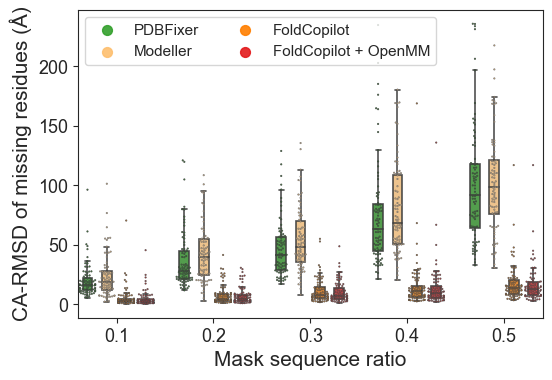

In [74]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
import numpy as np

pdbfixer_values = [list(i.values()) for i in rmsd_dict_pdbfixer.values()]
modeller_values = [list(i.values()) for i in rmsd_dict_modeller.values()]
foldcopilot_unrelaxed_values = [list(i.values()) for i in rmsd_dict_foldcopilot_unrelaxed.values()]
foldcopilot_relaxed_values = [list(i.values()) for i in rmsd_dict_foldcopilot_relaxed.values()]

x = [[],]
for i in range(5):
    x.append(pdbfixer_values[i])
    x.append(modeller_values[i])
    x.append(foldcopilot_unrelaxed_values[i])
    x.append(foldcopilot_relaxed_values[i])
    x.append([])


font_legend = FontProperties(fname=r"./arial.ttf", size=11)
font_axis = FontProperties(fname=r"./arial.ttf", size=13)
font_label = FontProperties(fname=r"./arial.ttf", size=15)
font_title = FontProperties(fname=r"./arial.ttf", size=17)

# boxplot using seaborn
plt.figure(figsize=(6,4))
sns.set_style('ticks')

C1 = plt.get_cmap('Paired')(1)
C2 = plt.get_cmap('Paired')(3)
C3 = plt.get_cmap('Paired')(6)
C4 = plt.get_cmap('Paired')(7)
C5 = plt.get_cmap('Paired')(5)

palette_ = [C1,C2,C3,C4,C5]

palette_ = palette_ + palette_ + palette_ + palette_ + palette_ + [C5]

f1 = sns.boxplot(data=x,palette=palette_,width=0.5,showfliers=False,linewidth=1.2,boxprops=dict(alpha=.9),
                 medianprops=dict(alpha=.9),whiskerprops=dict(alpha=.9),capprops=dict(alpha=.9),)

f1.set_xticks([2.5,7.5,12.5,17.5,22.5,],['0.1','0.2','0.3','0.4','0.5'],fontproperties=font_axis)
            #   ['0.1','0.2','0.3','0.4','0.5'],fontproperties=font_axis)
# f1.set_xticklabels(fontsize=11)
# f1.set_yticks(np.arange(0.5,1.1,0.1),['0.5','0.6','0.7','0.8','0.9','1.0','1.1'],fontproperties=font_axis)
f1.set_yticks(np.arange(0,250,50),np.arange(0,250,50),fontproperties=font_axis)
f1 = sns.swarmplot(data=x,palette=palette_,size=1,linewidth=0.5,edgecolor='gray',alpha=0.9,)

plt.scatter([], [], c=C2, alpha=0.9, s=50, label='PDBFixer')
plt.scatter([], [], c=C3, alpha=0.9, s=50, label='Modeller')
plt.scatter([], [], c=C4, alpha=0.9, s=50, label='FoldCopilot')
plt.scatter([], [], c=C5, alpha=0.9, s=50, label='FoldCopilot + OpenMM')



plt.xlabel('Mask sequence ratio',fontproperties=font_label)
plt.ylabel('CA-RMSD of missing residues (Å)',fontproperties=font_label)

# plt.title('TM-Score of Fixed Structures on CASP14 Tasks',fontproperties=font_title)
# plt.plot([0.5,20.5],[0.23,0.23],'r--',linewidth=1.5,label='DockQ=0.23')
plt.legend(prop=font_legend, loc = 'upper left', ncol=2)
plt.savefig('./RMSD-CASP14_boxplot.jpg',dpi=1200)
plt.show()
# plt.boxplot(x, labels=tmscore_dict_pdbfixer.keys())
# plt.show()

In [36]:
print(len(ref_align_idx))
print(len(query_align_idx))
print(len(ref_calculate_idx))
print(len(query_calculate_idx))

113
113
12
12


In [2]:
ref_align_idx = [237, 238, 239]
ref_atom_range = ' or '.join([f'resid {idx}' for idx in ref_align_idx])
ref_atom_range

'resid 237 or resid 238 or resid 239'

In [ ]:

### 2f4j v.s. 3k5v rmsd, aligned by Global frame
ref_protein_path_ = f'./2f4j.pdb'
ref = mda.Universe(ref_protein_path_)
ref_protein = ref.select_atoms('protein and backbone and resid 237-498')
coords_of_ref_protein = ref_protein.positions
print(np.asarray(coords_of_ref_protein).sum(-1).sum(-1))

template_path_ = f'./3k5v_fixed.pdb'
u = mda.Universe(template_path_)
temp_protein = u.select_atoms('protein and backbone and resid 256-517')
coords_of_temp_protein = temp_protein.positions
print(np.asarray(coords_of_temp_protein).sum(-1).sum(-1))

# aligner = align.AlignTraj(u, ref_protein, select='protein and backbone and resid 256-517').run()
rmsds = align.alignto(temp_protein,  # mobile
                      ref_protein,  # reference
                      select='protein and backbone', # selection to operate on
                      match_atoms=True) # whether to match atoms 
print(rmsds) # Global RMSD
coords_of_ref_protein = ref_protein.positions
print(np.asarray(coords_of_ref_protein).sum(-1).sum(-1))

coords_of_temp_protein = temp_protein.positions
print(np.asarray(coords_of_temp_protein).sum(-1).sum(-1))

ref_protein_al = ref_protein.universe.select_atoms('protein and backbone and resid 384-404')
temp_protein_al = temp_protein.universe.select_atoms('protein and backbone and resid 403-423')
ref_protein_al_coords = ref_protein_al.positions
temp_protein_al_coords = temp_protein_al.positions
ref_protein_al_mass_center = np.mean(ref_protein_al_coords, axis=0)
temp_protein_al_mass_center = np.mean(temp_protein_al_coords, axis=0)
mass_center_diff = ref_protein_al_mass_center - temp_protein_al_mass_center
mass_center_dist = np.sqrt(np.sum(mass_center_diff**2))
print(mass_center_dist)
error = np.sqrt(np.sum((ref_protein_al_coords - temp_protein_al_coords)**2))
print(error)



In [ ]:
with open(f'/home/zychen/Projects/FoldCopilot-rv1/modeller/statistic_data/violation_dict_pdbfixer.pkl', 'rb') as f:
    violation_dict_pdbfixer = pkl.load(f)
with open(f'/home/zychen/Projects/FoldCopilot-rv1/modeller/statistic_data/violation_dict_modeller.pkl', 'rb') as f:
    violation_dict_modeller = pkl.load(f)
with open(f'/home/zychen/Projects/FoldCopilot-rv1/modeller/statistic_data/violation_dict_foldcopilot_relaxed.pkl', 'rb') as f:
    violation_dict_foldcopilot_relaxed = pkl.load(f)
with open(f'/home/zychen/Projects/FoldCopilot-rv1/modeller/statistic_data/violation_dict_foldcopilot_unrelaxed.pkl', 'rb') as f:
    violation_dict_foldcopilot_unrelaxed = pkl.load(f)
    

CUDA backend failed to initialize: Found cuFFT version 10102, but JAX was built against version 10900, which is newer. The copy of cuFFT that is installed must be at least as new as the version against which JAX was built. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


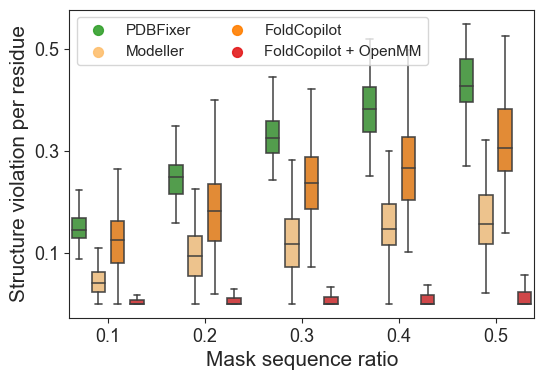

In [69]:

pdbfixer_values = [list(i.values()) for i in violation_dict_pdbfixer.values()]
modeller_values = [list(i.values()) for i in violation_dict_modeller.values()]
foldcopilot_unrelaxed_values = [list(i.values()) for i in violation_dict_foldcopilot_unrelaxed.values()]
foldcopilot_relaxed_values = [list(i.values()) for i in violation_dict_foldcopilot_relaxed.values()]

x = [[],]
for i in range(5):
    x.append(pdbfixer_values[i])
    x.append(modeller_values[i])
    x.append(foldcopilot_unrelaxed_values[i])
    x.append(foldcopilot_relaxed_values[i])
    x.append([])


font_legend = FontProperties(fname=r"./arial.ttf", size=11)
font_axis = FontProperties(fname=r"./arial.ttf", size=13)
font_label = FontProperties(fname=r"./arial.ttf", size=15)
font_title = FontProperties(fname=r"./arial.ttf", size=17)

# boxplot using seaborn
plt.figure(figsize=(6,4))
sns.set_style('ticks')

C1 = plt.get_cmap('Paired')(1)
C2 = plt.get_cmap('Paired')(3)
C3 = plt.get_cmap('Paired')(6)
C4 = plt.get_cmap('Paired')(7)
C5 = plt.get_cmap('Paired')(5)

palette_ = [C1,C2,C3,C4,C5]

palette_ = palette_ + palette_ + palette_ + palette_ + palette_ + [C5]

f1 = sns.boxplot(data=x,palette=palette_,width=0.7,showfliers=False,linewidth=1.2,boxprops=dict(alpha=.9),
                 medianprops=dict(alpha=.9),whiskerprops=dict(alpha=.9),capprops=dict(alpha=.9),)

f1.set_xticks([2.5, 7.5, 12.5, 17.5, 22.5],['0.1','0.2','0.3','0.4','0.5'],fontproperties=font_axis)
# f1.set_xticklabels(fontsize=11)
f1.set_yticks(np.arange(0.1,1.1,0.2),['0.1','0.3','0.5','0.7','0.9',],fontproperties=font_axis)

f1 = sns.swarmplot(data=x,palette=palette_,size=1,linewidth=0.5,edgecolor='gray',alpha=0.9,)

plt.scatter([], [], c=C2, alpha=0.9, s=50, label='PDBFixer')
plt.scatter([], [], c=C3, alpha=0.9, s=50, label='Modeller')
plt.scatter([], [], c=C4, alpha=0.9, s=50, label='FoldCopilot')
plt.scatter([], [], c=C5, alpha=0.9, s=50, label='FoldCopilot + OpenMM')



plt.xlabel('Mask sequence ratio',fontproperties=font_label)
plt.ylabel('Structure violation per residue',fontproperties=font_label)

# plt.title('TM-Score of Fixed Structures on CASP14 Tasks',fontproperties=font_title)
# plt.plot([0.5,20.5],[0.23,0.23],'r--',linewidth=1.5,label='DockQ=0.23')
plt.legend(prop=font_legend, ncol=2)
plt.savefig('./violation-CASP14_boxplot.jpg',dpi=1200)
plt.show()
# plt.boxplot(x, labels=tmscore_dict_pdbfixer.keys())
# plt.show()

#### new area